In [1]:
source('functions.R')

DATASET_FILENAME = './combined.csv'

MYLIBRARIES<-c("outliers",
               "corrplot",
               "MASS",
               "formattable",
               "stats",
               "caret",
               "PerformanceAnalytics",
               "smotefamily")

install.packages('e1071')
library(caret)
library(e1071)

# ************************************************
# This is where R starts execution

# Automatically release memory
gc()

# Tries to clear plots and other graphics in RStudio output
if(!is.null(dev.list())) dev.off()
graphics.off()

# This clears all warning messages
#assign("last.warning", NULL, envir = baseenv())

# clears the RStudio console area
cat("\014")

# If library not already on your computer this will download and
# install the library. Each library is activated.
library(pacman)
pacman::p_load(char=MYLIBRARIES,install=TRUE,character.only=TRUE)

Warning message in install.packages("e1071"):
“installation of package ‘e1071’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: ggplot2

Loading required package: lattice



,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2295308,122.6,4480827,239.4,3555075,189.9
Vcells,3929053,30.0,8388608,64.0,7474010,57.1


null device 
          1

# Load a passenger satisfaction dataset 

In [2]:
dataset1<-NreadDataset('./dataset/satisfaction.csv')
dataset2<-NreadDataset('./dataset/satisfaction_2015.csv')

[1] "CSV dataset ./dataset/satisfaction.csv has been read. Records= 129880"
[1] "CSV dataset ./dataset/satisfaction_2015.csv has been read. Records= 129880"


### Check the similar field of both dataset 

In [3]:
# remove ID field which index is at 1 (-1 will remove index at position 1 )
dataset1 = dataset1[,-1]
dataset2 = dataset2[,-1]

names(dataset1)
names(dataset2)

[1] "satisfactionv2"                 "Gender"                        
 [3] "CustomerType"                   "Age"                           
 [5] "TypeofTravel"                   "Class"                         
 [7] "FlightDistance"                 "Seatcomfort"                   
 [9] "DepartureArrivaltimeconvenient" "Foodanddrink"                  
[11] "Gatelocation"                   "Inflightwifiservice"           
[13] "Inflightentertainment"          "Onlinesupport"                 
[15] "EaseofOnlinebooking"            "Onboardservice"                
[17] "Legroomservice"                 "Baggagehandling"               
[19] "Checkinservice"                 "Cleanliness"                   
[21] "Onlineboarding"                 "DepartureDelayinMinutes"       
[23] "ArrivalDelayinMinutes"

[1] "satisfactionv2"                 "Gender"                        
 [3] "CustomerType"                   "Age"                           
 [5] "TypeofTravel"                   "Class"                         
 [7] "FlightDistance"                 "Inflightwifiservice"           
 [9] "DepartureArrivaltimeconvenient" "EaseofOnlinebooking"           
[11] "Gatelocation"                   "Foodanddrink"                  
[13] "Onlineboarding"                 "Seatcomfort"                   
[15] "Inflightentertainment"          "Onboardservice"                
[17] "Legroomservice"                 "Baggagehandling"               
[19] "Checkinservice"                 "Inflightservice"               
[21] "Cleanliness"                    "DepartureDelayinMinutes"       
[23] "ArrivalDelayinMinutes"

## Check different in both Dataframe

In [4]:
# Field that dataset 1 have but dataset 2 doesnt have
names(dataset1)[-which(names(dataset1) %in% names(dataset2))]

# Field that dataset 2 have but dataset 1 doesnt have 
names(dataset2)[-which(names(dataset2) %in% names(dataset1))]

[1] "Onlinesupport"

[1] "Inflightservice"

### Field a different with NA and combine both dataset

In [5]:
dataset1[setdiff(names(dataset2), names(dataset1))] <- NA
dataset2[setdiff(names(dataset1), names(dataset2))] <- NA

In [6]:
# combine both tables
combined<-rbind(dataset1, dataset2)

In [7]:
nrow(combined)

[1] 259760

In [8]:
head(combined)

,satisfactionv2,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Seatcomfort,DepartureArrivaltimeconvenient,Foodanddrink,⋯,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes,Inflightservice
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,⋯,3,3,0,3,5,3,2,0,0,NA
2,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,⋯,3,4,4,4,2,3,2,310,305,NA
3,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,⋯,2,3,3,4,4,4,2,0,0,NA
4,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,⋯,1,1,0,1,4,1,3,0,0,NA
5,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,⋯,2,2,0,2,4,2,5,0,0,NA
6,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,⋯,2,5,4,5,5,4,2,0,0,NA


# Data cleaning

In [9]:
#remove colums which field which have more that 50 % is NA value. Inflightservice and Onlinesupport

rm_combined<-combined[, -which(names(combined) %in% c('Inflightservice','Onlinesupport'))]

In [10]:
summary(rm_combined)

 satisfactionv2        Gender          CustomerType            Age       
 Length:259760      Length:259760      Length:259760      Min.   : 7.00  
 Class :character   Class :character   Class :character   1st Qu.:27.00  
 Mode  :character   Mode  :character   Mode  :character   Median :40.00  
                                                          Mean   :39.43  
                                                          3rd Qu.:51.00  
                                                          Max.   :85.00  
                                                                         
 TypeofTravel          Class           FlightDistance  Seatcomfort  
 Length:259760      Length:259760      Min.   :  31   Min.   :0.00  
 Class :character   Class :character   1st Qu.: 606   1st Qu.:2.00  
 Mode  :character   Mode  :character   Median :1510   Median :3.00  
                                       Mean   :1586   Mean   :3.14  
                                       3rd Qu.:2297   3rd Qu.:4

In [11]:
# Filling a Null value with median value of that field which is 0
# the reseason of choosing median over mean of the field to prevent a chance of creating new outlier
rm_combined$ArrivalDelayinMinutes[is.na(rm_combined$ArrivalDelayinMinutes)] <- 0 


In [12]:
dataset<-rm_combined

In [13]:
#  Load dataset 
#dataset<- NreadDataset(DATASET_FILENAME)

In [14]:
# display name of a fields in dataset 
names(dataset)
#  display a first 6 row of dataset 
head(dataset)

[1] "satisfactionv2"                 "Gender"                        
 [3] "CustomerType"                   "Age"                           
 [5] "TypeofTravel"                   "Class"                         
 [7] "FlightDistance"                 "Seatcomfort"                   
 [9] "DepartureArrivaltimeconvenient" "Foodanddrink"                  
[11] "Gatelocation"                   "Inflightwifiservice"           
[13] "Inflightentertainment"          "EaseofOnlinebooking"           
[15] "Onboardservice"                 "Legroomservice"                
[17] "Baggagehandling"                "Checkinservice"                
[19] "Cleanliness"                    "Onlineboarding"                
[21] "DepartureDelayinMinutes"        "ArrivalDelayinMinutes"

,satisfactionv2,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Seatcomfort,DepartureArrivaltimeconvenient,Foodanddrink,⋯,Inflightentertainment,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,⋯,4,3,3,0,3,5,3,2,0,0
2,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,⋯,2,3,4,4,4,2,3,2,310,305
3,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,⋯,0,2,3,3,4,4,4,2,0,0
4,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,⋯,4,1,1,0,1,4,1,3,0,0
5,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,⋯,3,2,2,0,2,4,2,5,0,0
6,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,⋯,0,2,5,4,5,5,4,2,0,0


In [15]:
# remove unwanted columns 
#required_cols<-!names(dataset)%in%c("X")
#dataset<- dataset[,required_cols]
names(dataset)

[1] "satisfactionv2"                 "Gender"                        
 [3] "CustomerType"                   "Age"                           
 [5] "TypeofTravel"                   "Class"                         
 [7] "FlightDistance"                 "Seatcomfort"                   
 [9] "DepartureArrivaltimeconvenient" "Foodanddrink"                  
[11] "Gatelocation"                   "Inflightwifiservice"           
[13] "Inflightentertainment"          "EaseofOnlinebooking"           
[15] "Onboardservice"                 "Legroomservice"                
[17] "Baggagehandling"                "Checkinservice"                
[19] "Cleanliness"                    "Onlineboarding"                
[21] "DepartureDelayinMinutes"        "ArrivalDelayinMinutes"

### Display Summary of dataset
Checking a type of each fields (numeric or symbolic) and also checking for missing value

In [16]:
# displat summary of dataset 
summary(dataset)

 satisfactionv2        Gender          CustomerType            Age       
 Length:259760      Length:259760      Length:259760      Min.   : 7.00  
 Class :character   Class :character   Class :character   1st Qu.:27.00  
 Mode  :character   Mode  :character   Mode  :character   Median :40.00  
                                                          Mean   :39.43  
                                                          3rd Qu.:51.00  
                                                          Max.   :85.00  
 TypeofTravel          Class           FlightDistance  Seatcomfort  
 Length:259760      Length:259760      Min.   :  31   Min.   :0.00  
 Class :character   Class :character   1st Qu.: 606   1st Qu.:2.00  
 Mode  :character   Mode  :character   Median :1510   Median :3.00  
                                       Mean   :1586   Mean   :3.14  
                                       3rd Qu.:2297   3rd Qu.:4.00  
                                       Max.   :6951   Max.   :5.00  

In [17]:
# Visualize a summary with different function
prettydataset<-NPREPROCESSING_prettyDataset(dataset)
prettydataset

HTML widgets cannot be represented in plain text (need html)

In [18]:
# assigning a field type to each fields in Dataset

TYPE_DISCRETE     <- "DISCRETE"           # field is discrete (numeric)
TYPE_ORDINAL      <- "ORDINAL"            # field is continuous numeric
TYPE_SYMBOLIC     <- "SYMBOLIC"           # field is a string
TYPE_NUMERIC      <- "NUMERIC"            # field is initially a numeric
TYPE_IGNORE       <- "IGNORE"             # field is not encoded

# This function will differentiate between Numeric and Symbolic
field_types<-NPREPROCESSING_initialFieldType(dataset)

In [19]:
# Total number of fields
print(paste('Total columns ',ncol(dataset)))
# index of numeric fields
numeric_index<-field_types=="NUMERIC"
# index of symbolic fields
symbolic_index<-field_types=="SYMBOLIC"
# names of colums that are numeric
numeric_fields<-names(dataset[,numeric_index])
# names of colums that are symbolic 
symbolic_fields<-names(dataset[,symbolic_index])
print("**************************************************")
print(paste("Numeric Fields : ", length(numeric_fields)))
print(numeric_fields)
print("**************************************************")
print(paste("Symbolic Fields :", length(symbolic_fields)))
print(symbolic_fields)
print("**************************************************")

# Statisfaction Scale Fields
sat_cols<- c("Inflightwifiservice" ,"DepartureArrivaltimeconvenient",
            "EaseofOnlinebooking","Gatelocation","Foodanddrink",
            "Onlineboarding","Seatcomfort","Inflightentertainment",
            "Onboardservice","Legroomservice","Baggagehandling",
            "Checkinservice","Cleanliness")
print(paste("Satisfy scale Fields : ",length(sat_cols)))

print(sat_cols)
print("**************************************************")
# Other numeric fields that is not satisfaction scale fields
pure_numerical_val<-c('Age', 'FlightDistance', 'DepartureDelayinMinutes','ArrivalDelayinMinutes')
time_field<-c('DepartureDelayinMinutes','ArrivalDelayinMinutes')
distance_field<-c('FlightDistance')
print(paste("others numercial Fields : ",length(pure_numerical_val)))

print(pure_numerical_val)

[1] "Total columns  22"
[1] "**************************************************"
[1] "Numeric Fields :  17"
 [1] "Age"                            "FlightDistance"                
 [3] "Seatcomfort"                    "DepartureArrivaltimeconvenient"
 [5] "Foodanddrink"                   "Gatelocation"                  
 [7] "Inflightwifiservice"            "Inflightentertainment"         
 [9] "EaseofOnlinebooking"            "Onboardservice"                
[11] "Legroomservice"                 "Baggagehandling"               
[13] "Checkinservice"                 "Cleanliness"                   
[15] "Onlineboarding"                 "DepartureDelayinMinutes"       
[17] "ArrivalDelayinMinutes"         
[1] "**************************************************"
[1] "Symbolic Fields : 5"
[1] "satisfactionv2" "Gender"         "CustomerType"   "TypeofTravel"  
[5] "Class"         
[1] "**************************************************"
[1] "Satisfy scale Fields :  13"
 [1] "Inflightwifise

### This summary show that 5 fields in a dataset are symbolic and remaining are numeric

### Symbolic fields are :-

 Satifactionv2 , Gender, Customer , TypeofTravel and Class

### Numeric fields are :-

Age, FlightDistance, Seatcomfort, DepartureArrivaltimeconvenient, Foodanddrink, Gatelocation, Inflightwifiservice, Inflightentertainment, EaseofOnlinebooking, Onboardservice, Legroomservice, Baggagehandling, Checkinservice, Cleanliness, Onlineboarding, DepartureDelayinMinutes,  and ArrivalDelayinMinutes

Where 13 numeric fields are the columns containing satifaction level provided from a customer from a scaling 0 to 5  and other 4 numeric field are age of customer , travel distance of a flight and last two fields are time delay in minute

# Visualizing Numeric fields

## Visualizing a correlation of numeric fields

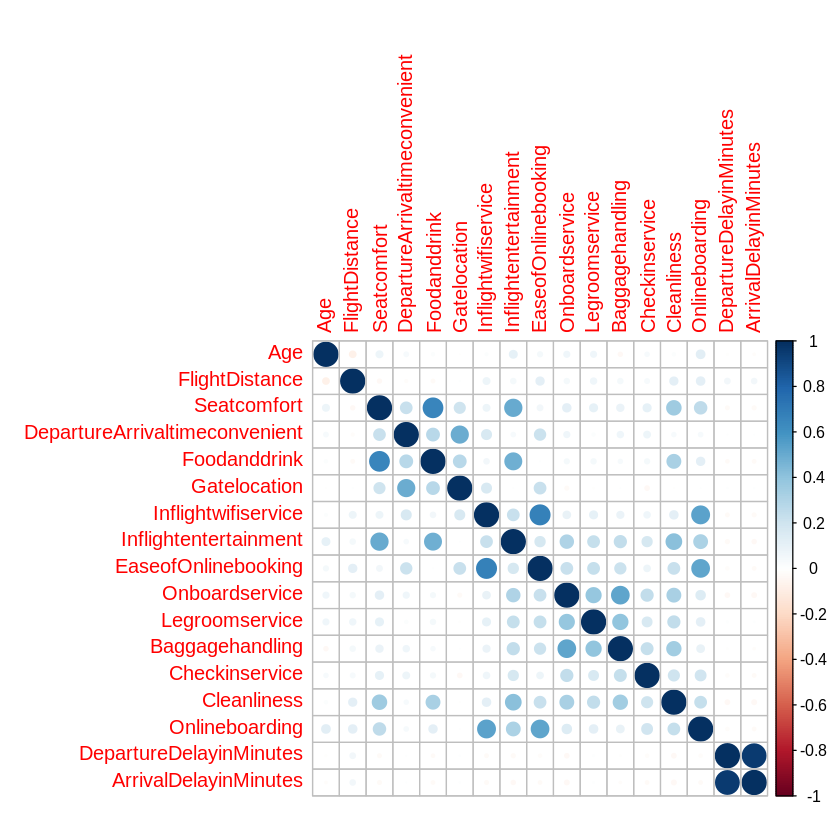

In [20]:
# Visualizing a correlation of numeric fields
library(corrplot)
correlations <- cor(dataset[,numeric_fields])
corrplot(cor(dataset[,numeric_fields]), method="circle")

## Visualzing a Box Plot of a fields containing statisfaction level

We can see that most of the fields containing statisfaction level have a good balance normal distribution but some still have a somem outliers and also positive and negative skewing such in Onboard service, Baggehandling, Checkinservice, Cleanliness

Also, The satisfaction scale is rating between 0-5 but in Baggagehandling the range of value dataset contains in that field is 1-5

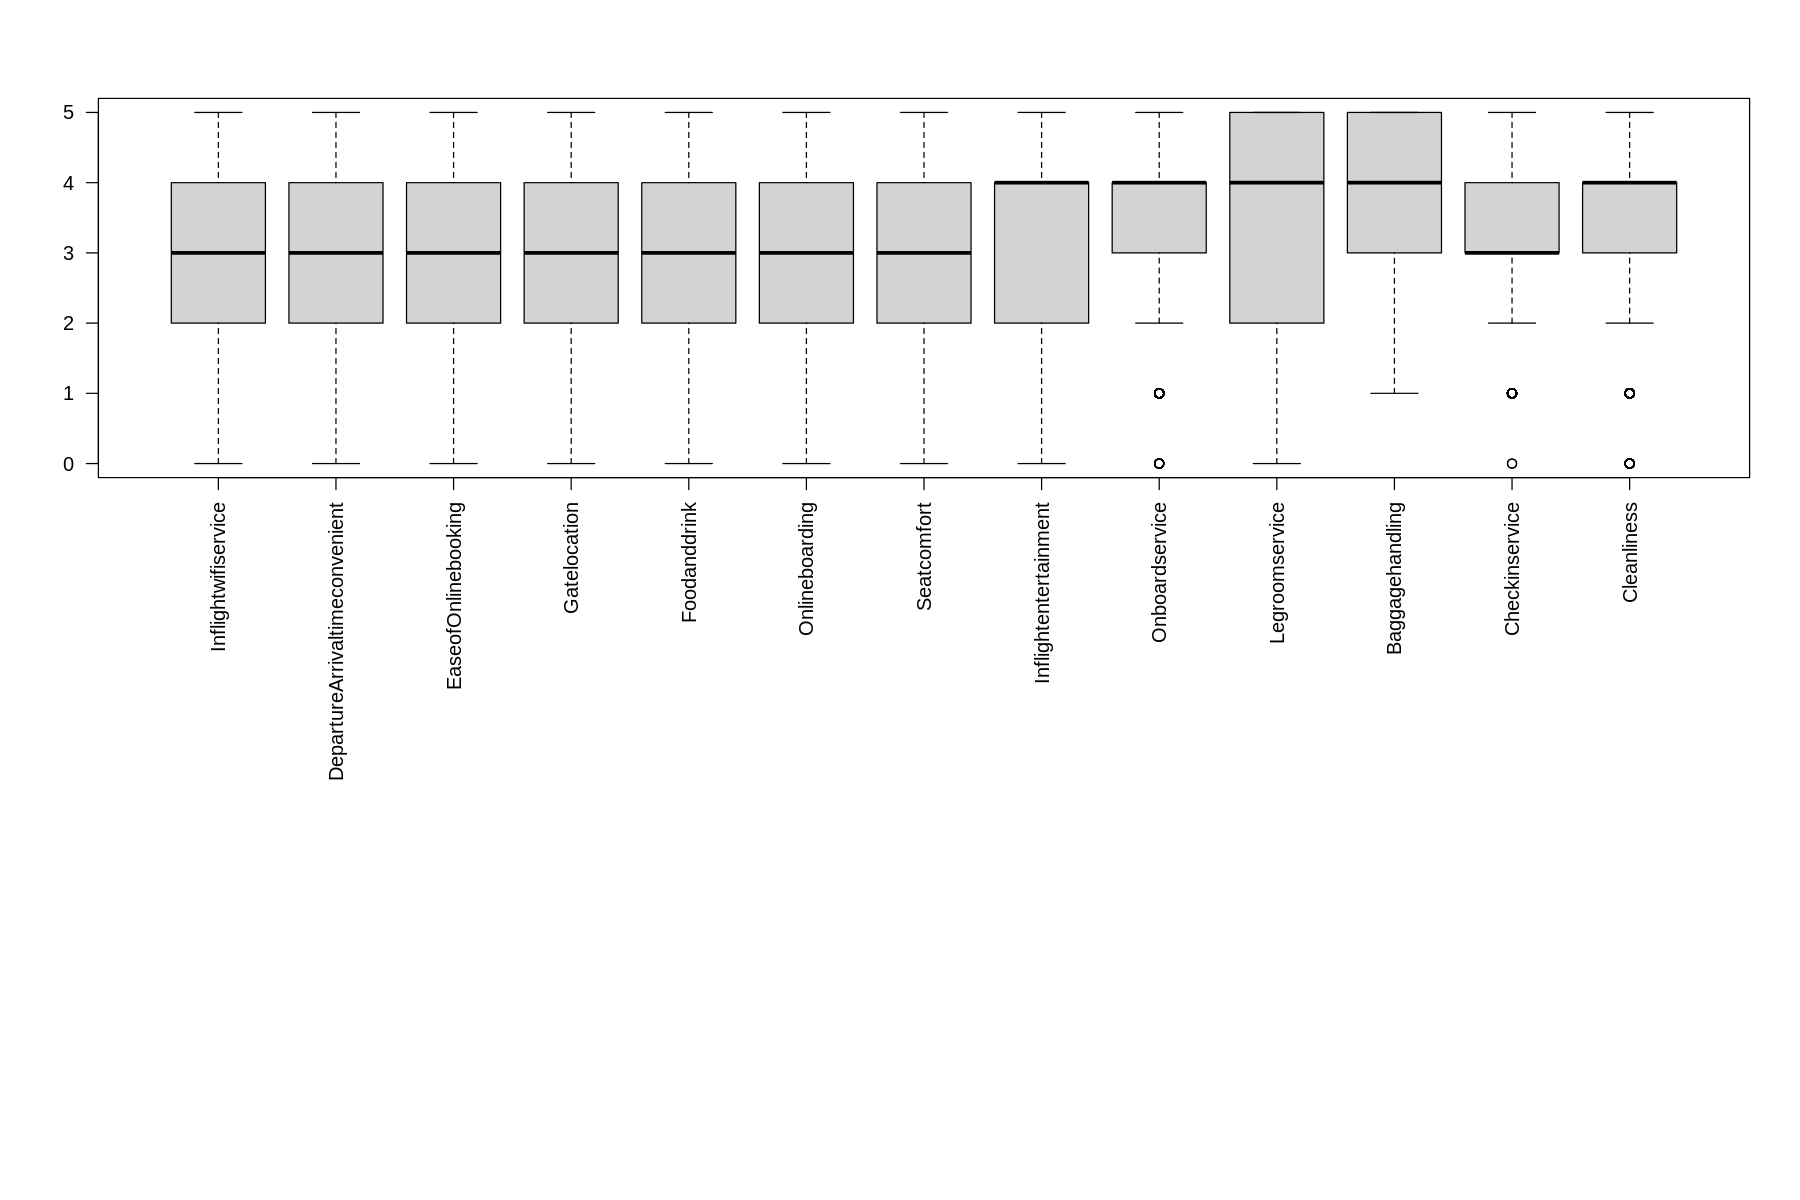

In [21]:
# Box plot
par(mfrow=c(2,1))
options(repr.plot.width = 15, repr.plot.height = 10)
# satisfaction data

satis_data<-dataset[,sat_cols]

boxplot(satis_data, las = 2)


## Visualizing a Historgram in in other numeric fields'


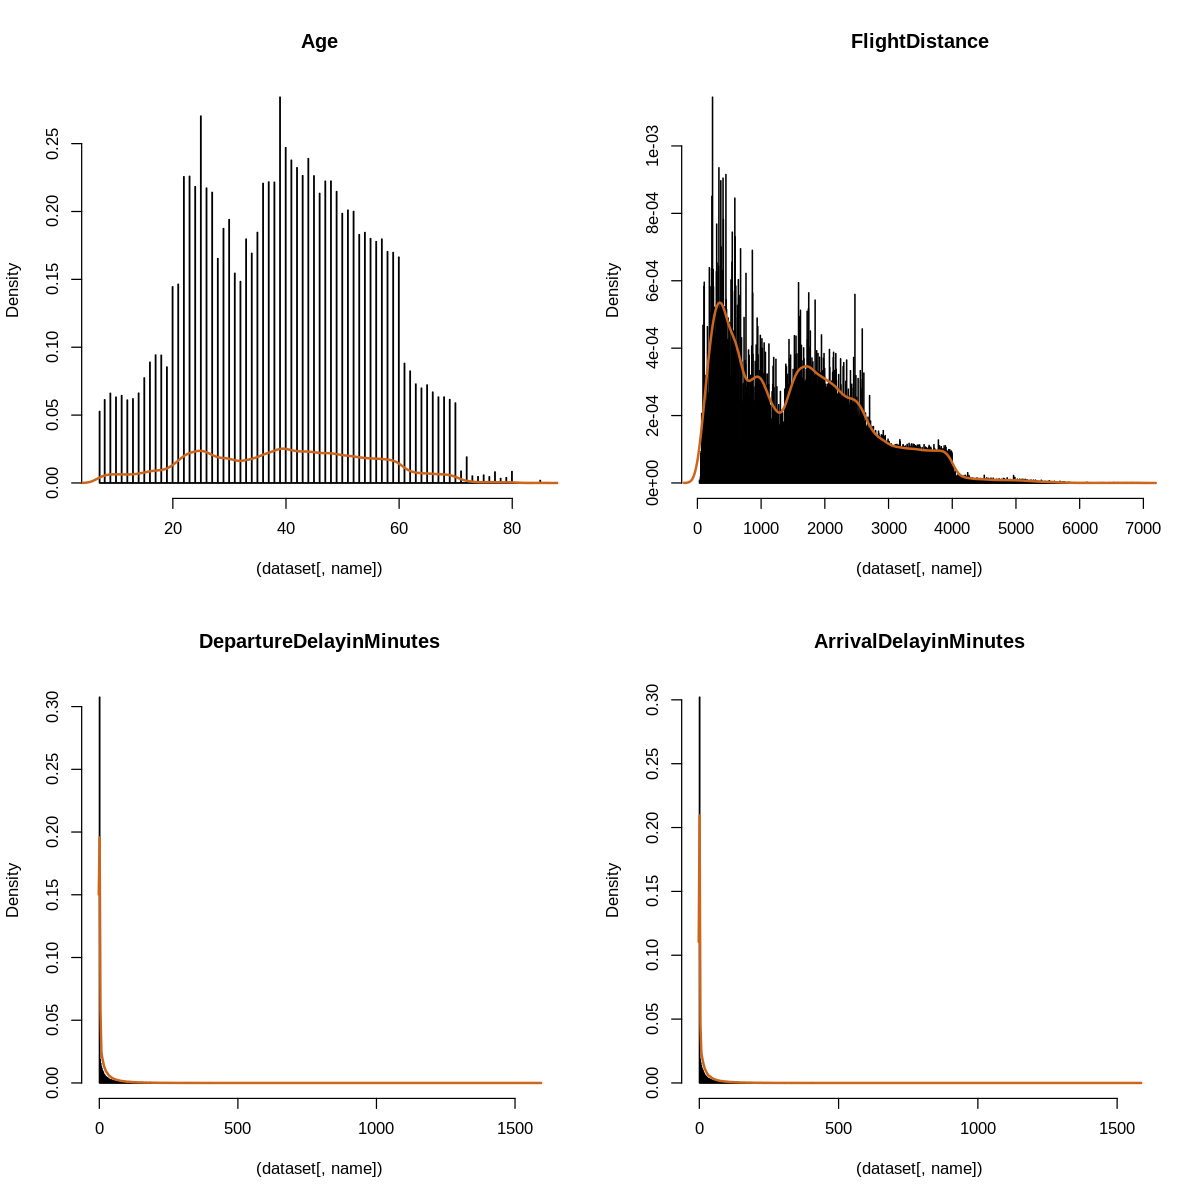

In [25]:
# Box plot
# satisfaction data

other_num<-dataset[,pure_numerical_val]

par(mfrow=c(2,2))
options(repr.plot.width = 10, repr.plot.height = 10)
for (name in pure_numerical_val){
    
    hist((dataset[,name]), main=name,breaks=1000,prob=TRUE)
    lines(density(dataset[,name]),
      lwd = 2,
      col = "chocolate3")
}


# Visualize Symbolic Fields

## Use BarChart to display a distribution of each categories in each fields


neutral or dissatisfied               satisfied 
                 132245                  127515 

Female   Male 
131798 127962 


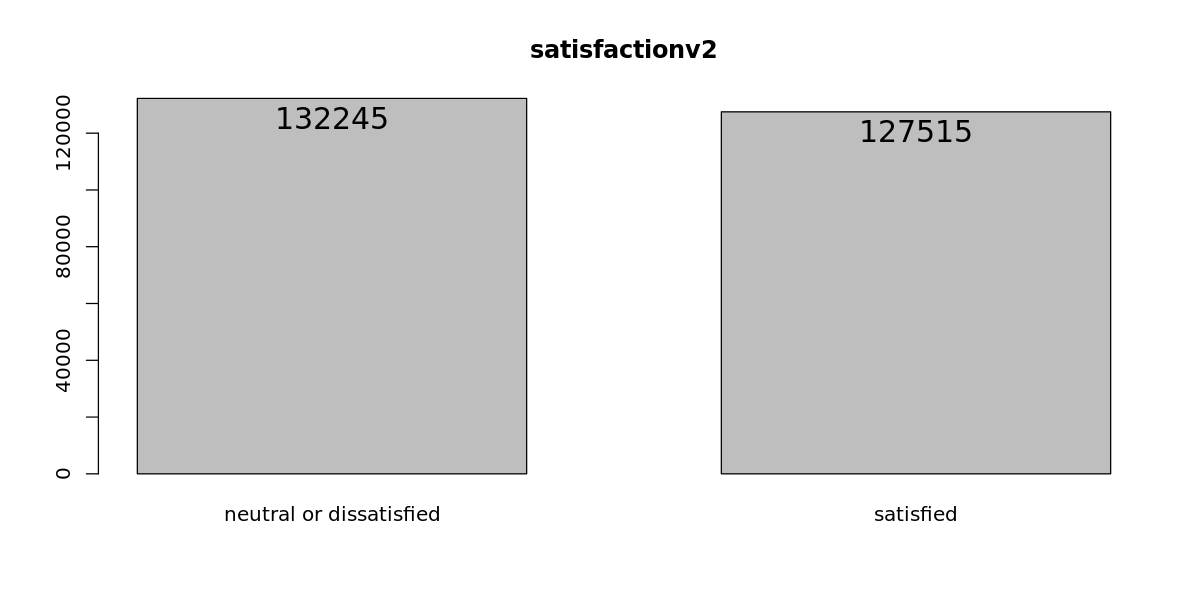


disloyal Customer    Loyal Customer 
            47560            212200 


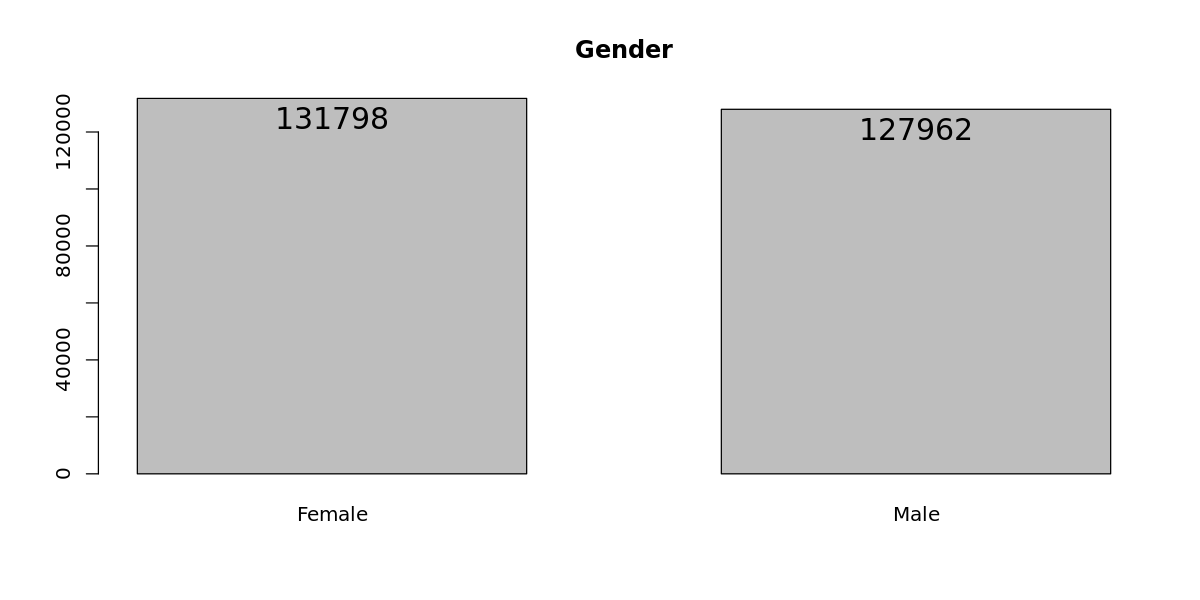


Business travel Personal Travel 
         179386           80374 


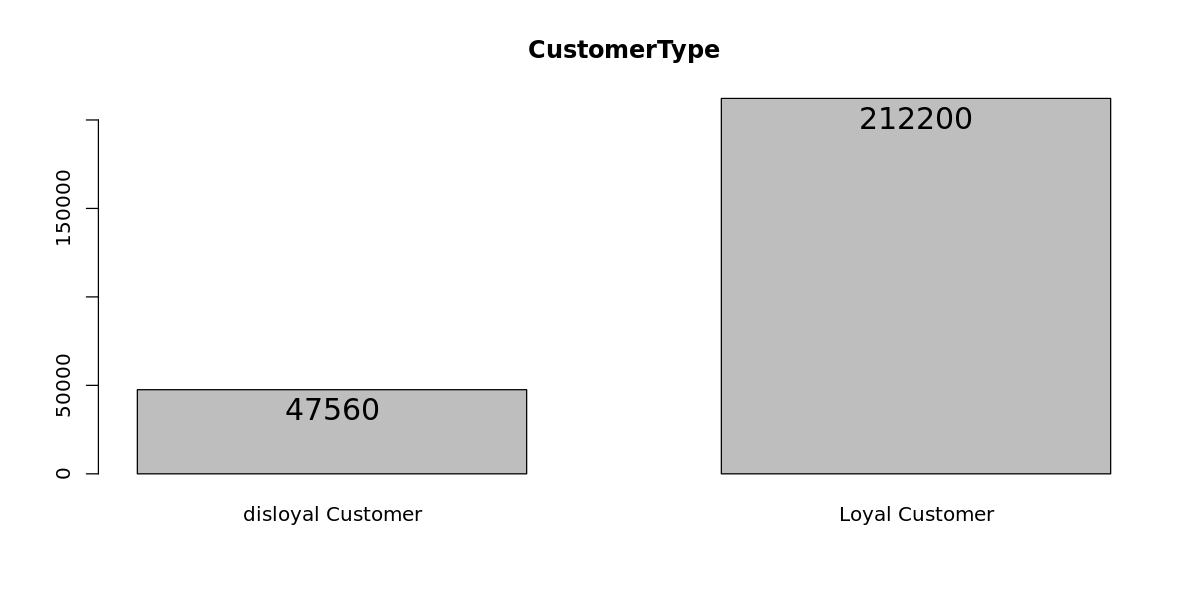


Business      Eco Eco Plus 
  124320   116618    18822 


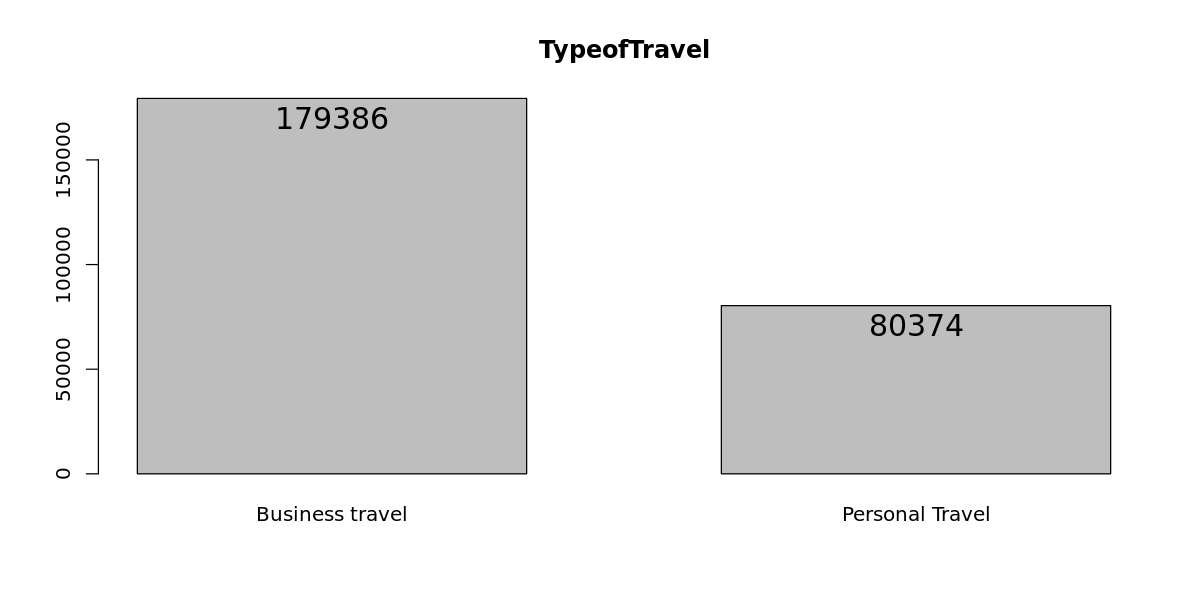

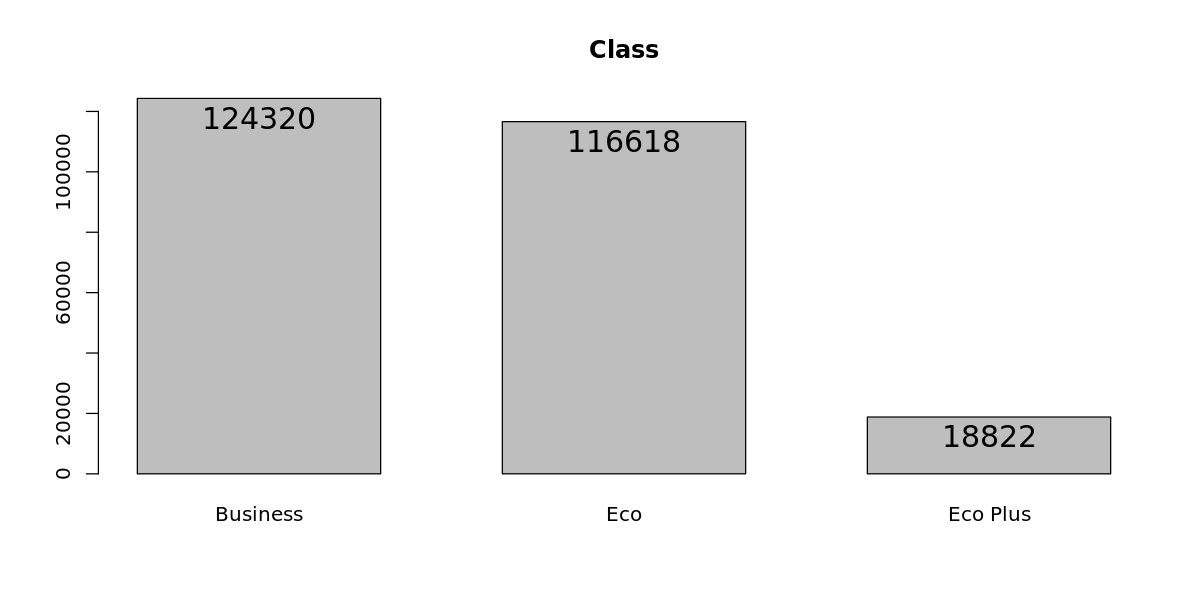

In [243]:
par(mfrow=c(1,1),pty = "m")
options(repr.plot.width = 10, repr.plot.height = 5)
for (name in symbolic_fields){
    counts <- table(dataset[,name])
    print(counts)

    xx<-barplot(counts, main=name,space=0.5) 
    ## Add text at top of bars
    text(x = xx, y = counts, label = counts , pos = 1, cex = 1.5, col = "black") 
  
    ## Add x-axis labels 
    
}



## Visualizing Relationship between a symbolic fields

                         Class
satisfactionv2            Business   Eco Eco Plus
  neutral or dissatisfied    37059 82702    12484
  satisfied                  87261 33916     6338

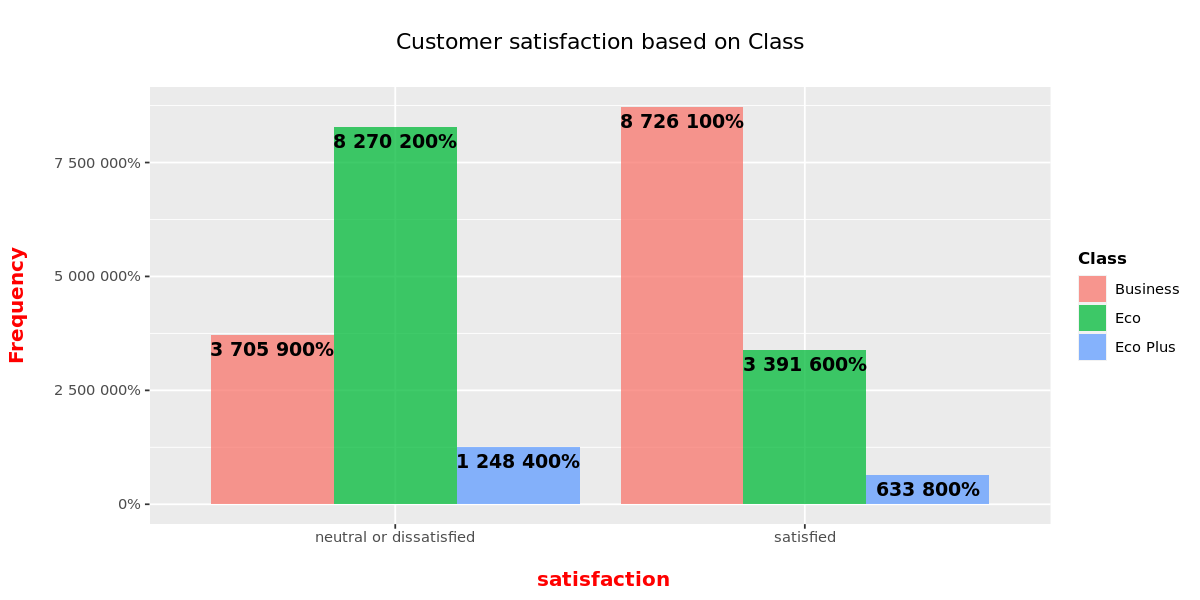

In [250]:
library("ggplot2")
sat_class = dataset[,c('satisfactionv2','Class')]
table(sat_class)
results <- data.frame(table(sat_class))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Class)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Class \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

                         Gender
satisfactionv2            Female  Male
  neutral or dissatisfied  60601 71644
  satisfied                71197 56318

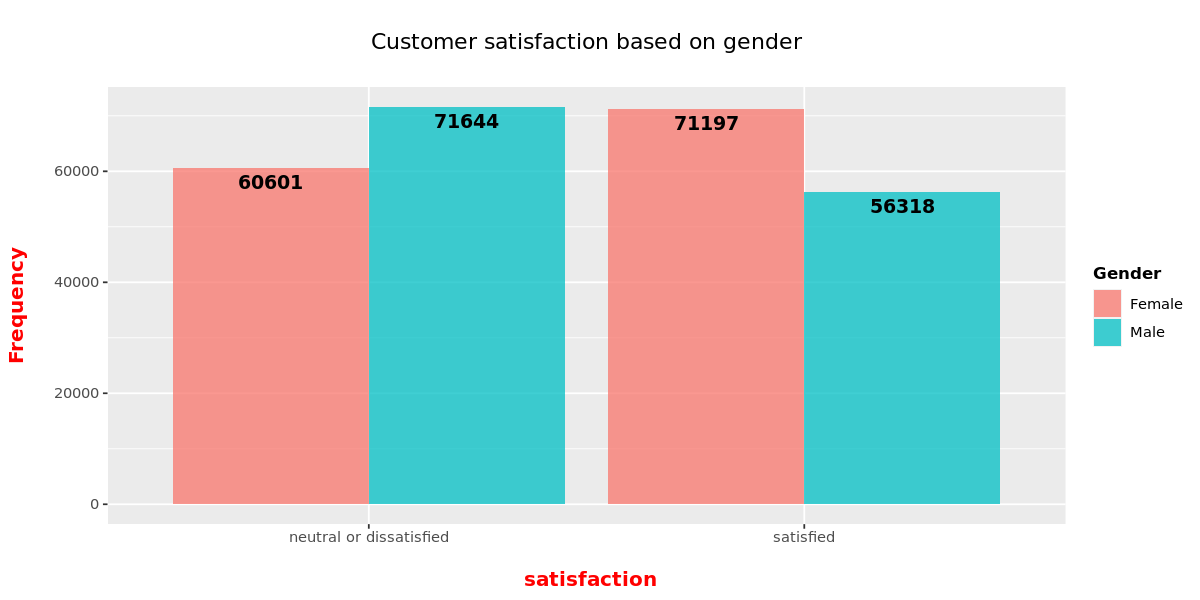

In [111]:
library("ggplot2")
sat_gender = dataset[,c('satisfactionv2','Gender')]
table(sat_gender)
results <- data.frame(table(sat_gender))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Gender)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on gender \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

                         CustomerType
satisfactionv2            disloyal Customer Loyal Customer
  neutral or dissatisfied             36160          96085
  satisfied                           11400         116115

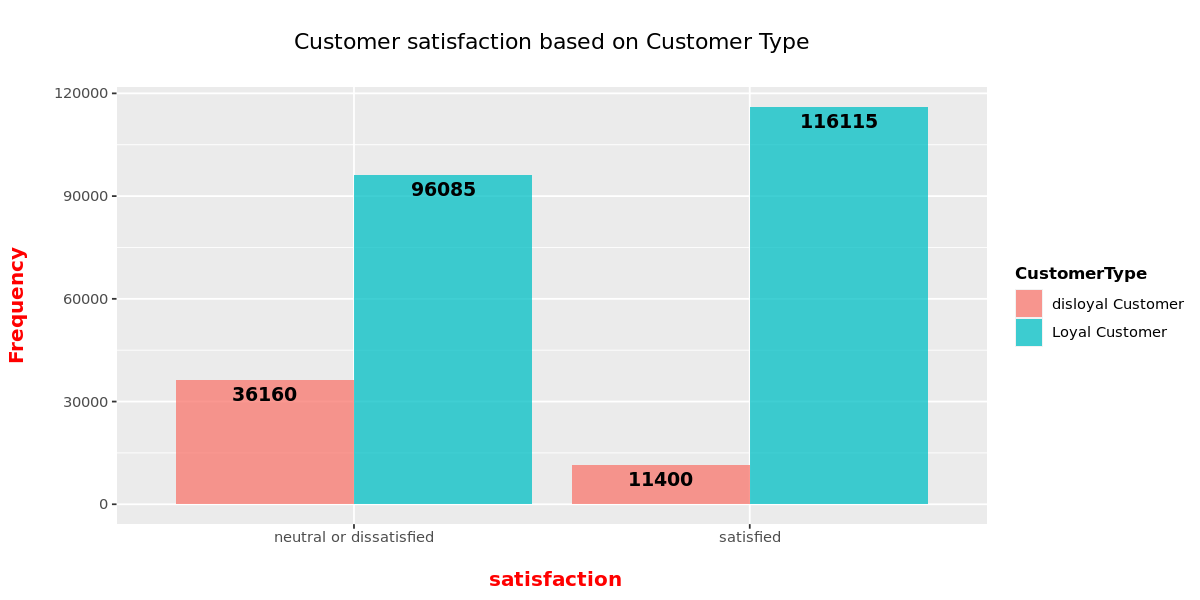

In [112]:

sat_type = dataset[,c('satisfactionv2','CustomerType')]
table(sat_type)
results <- data.frame(table(sat_type))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = CustomerType)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Customer Type \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

                         TypeofTravel
satisfactionv2            Business travel Personal Travel
  neutral or dissatisfied           74674           57571
  satisfied                        104712           22803

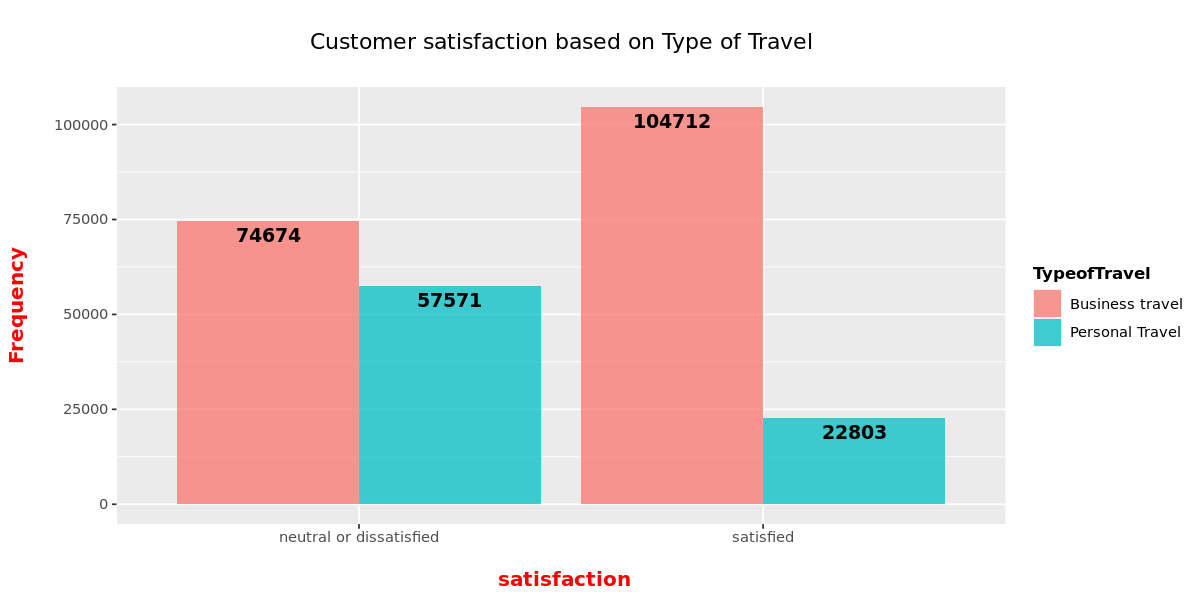

In [113]:
sat_type = dataset[,c('satisfactionv2','TypeofTravel')]
table(sat_type)
results <- data.frame(table(sat_type))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =TypeofTravel)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Type of Travel \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

## Visualizing Relationship between a Cusomter Satisfaction fields with fields containing Satisfaction scale

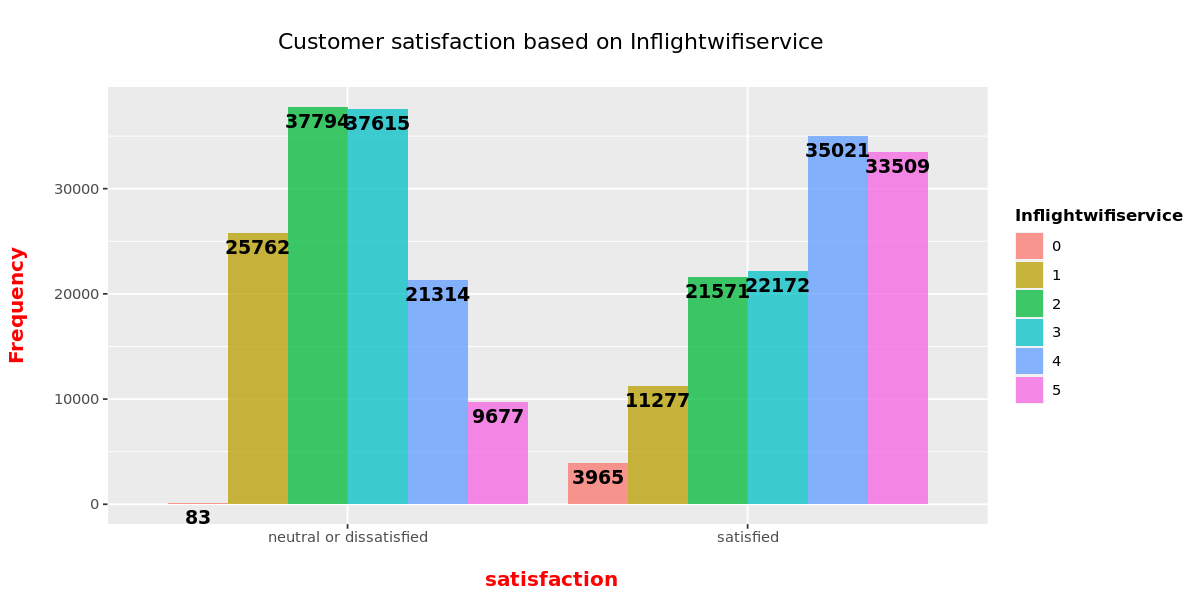

In [114]:

par(mfrow=c(2,4),pty = "m")
options(repr.plot.width = 10,epr.plot.height = 5)

temp_df<-cbind(dataset[,c('satisfactionv2','Inflightwifiservice')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =Inflightwifiservice)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Inflightwifiservice\n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

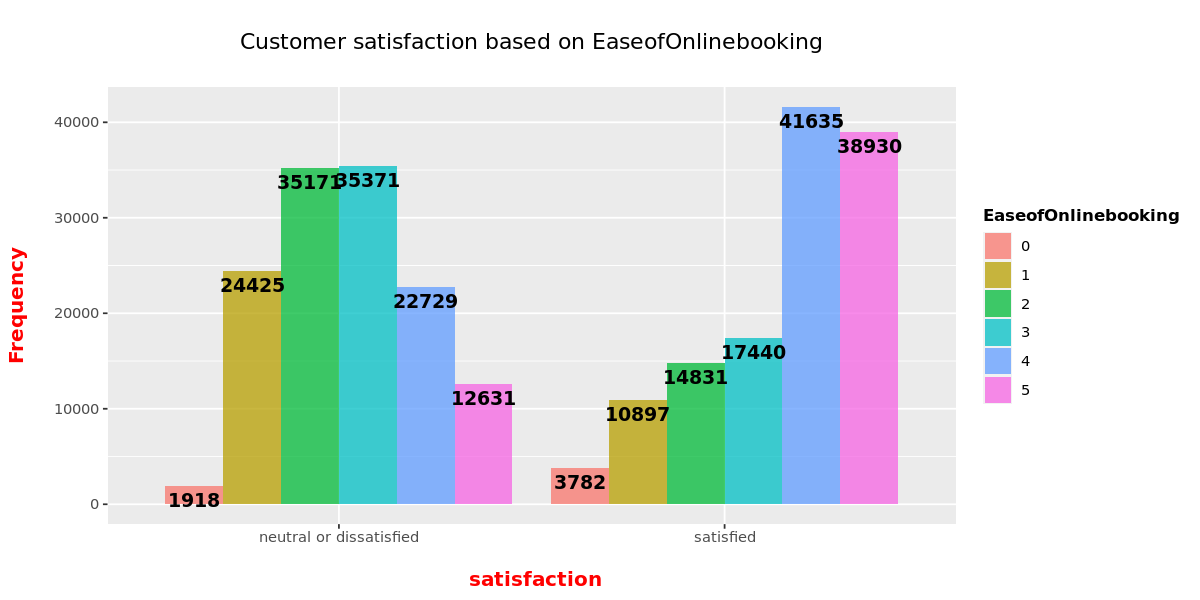

In [115]:
temp_df<-cbind(dataset[,c('satisfactionv2','EaseofOnlinebooking')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =EaseofOnlinebooking)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on EaseofOnlinebooking \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

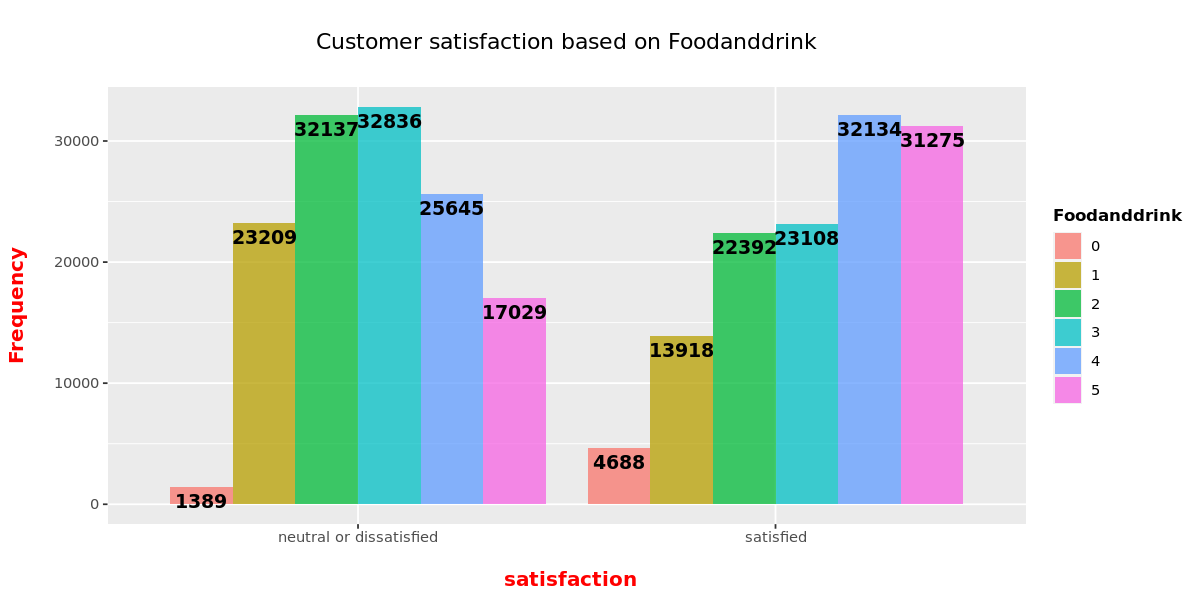

In [116]:
temp_df<-cbind(dataset[,c('satisfactionv2','Foodanddrink')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Foodanddrink)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Foodanddrink \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

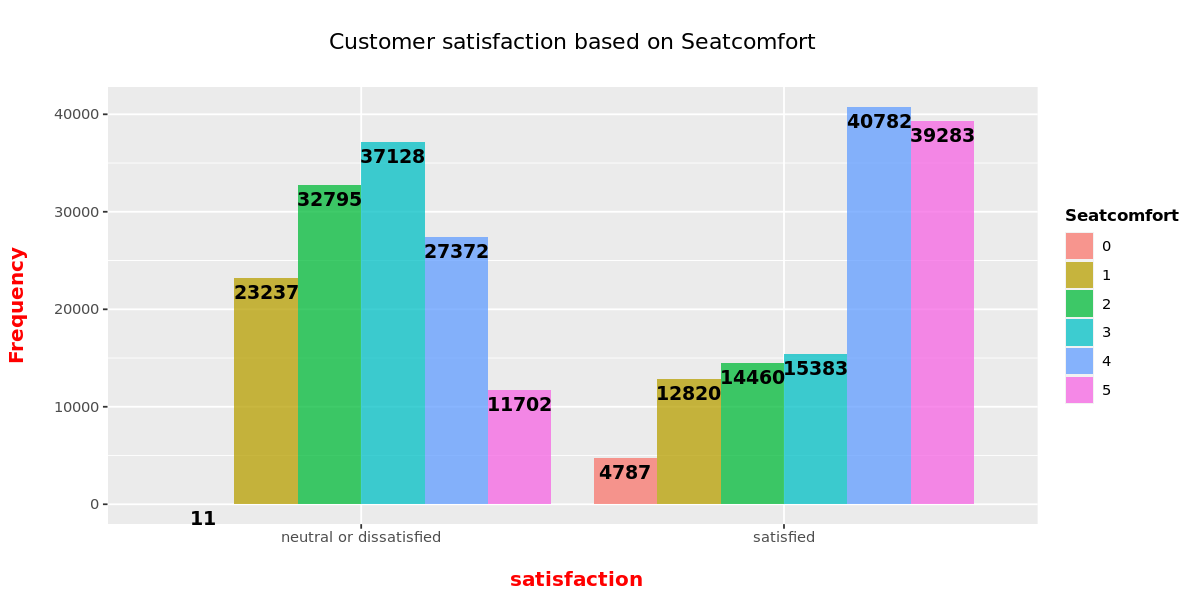

In [117]:
temp_df<-cbind(dataset[,c('satisfactionv2','Seatcomfort')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Seatcomfort)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Seatcomfort \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

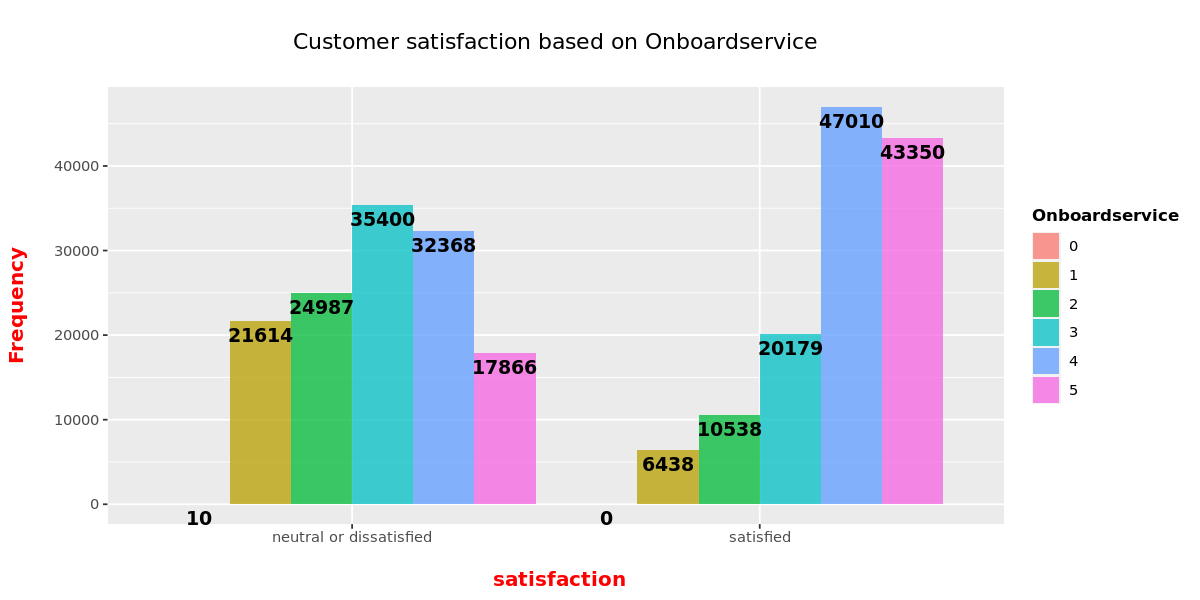

In [118]:
temp_df<-cbind(dataset[,c('satisfactionv2','Onboardservice')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Onboardservice)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Onboardservice \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

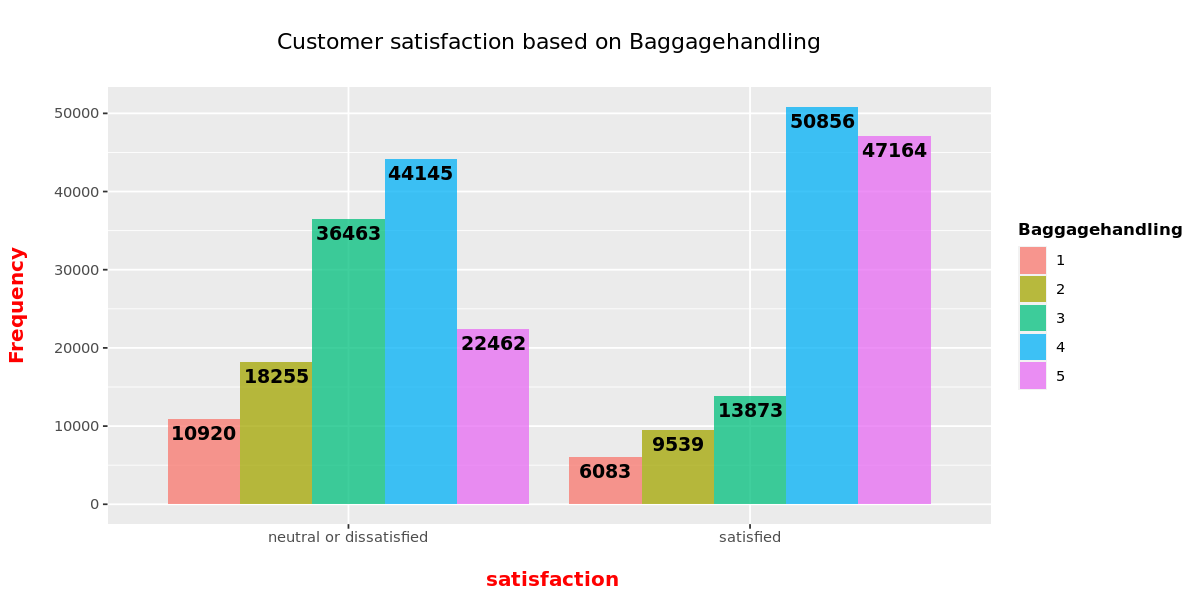

In [119]:
temp_df<-cbind(dataset[,c('satisfactionv2','Baggagehandling')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Baggagehandling)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Baggagehandling \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

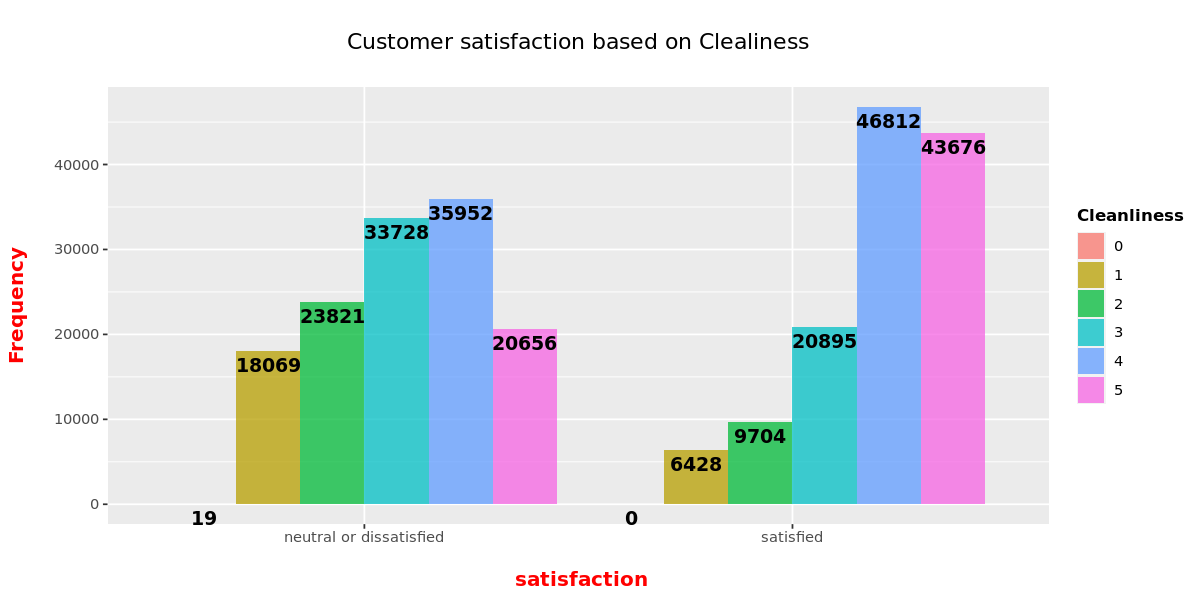

In [120]:
temp_df<-cbind(dataset[,c('satisfactionv2','Cleanliness')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Cleanliness)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Clealiness \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

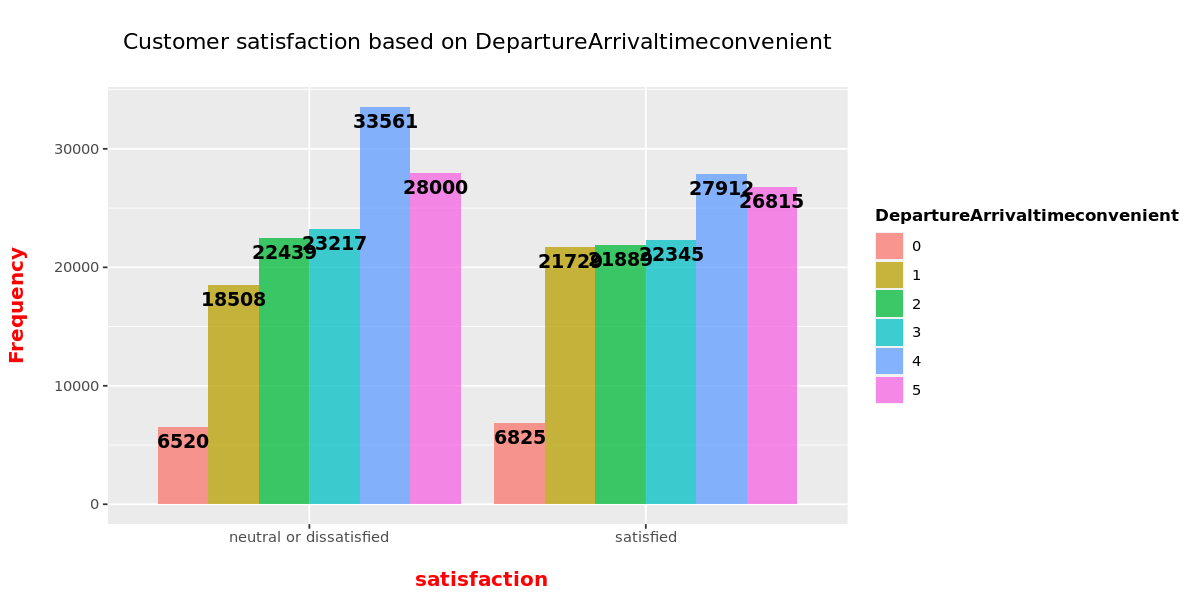

In [121]:
temp_df<-cbind(dataset[,c('satisfactionv2','DepartureArrivaltimeconvenient')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = DepartureArrivaltimeconvenient)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on DepartureArrivaltimeconvenient \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

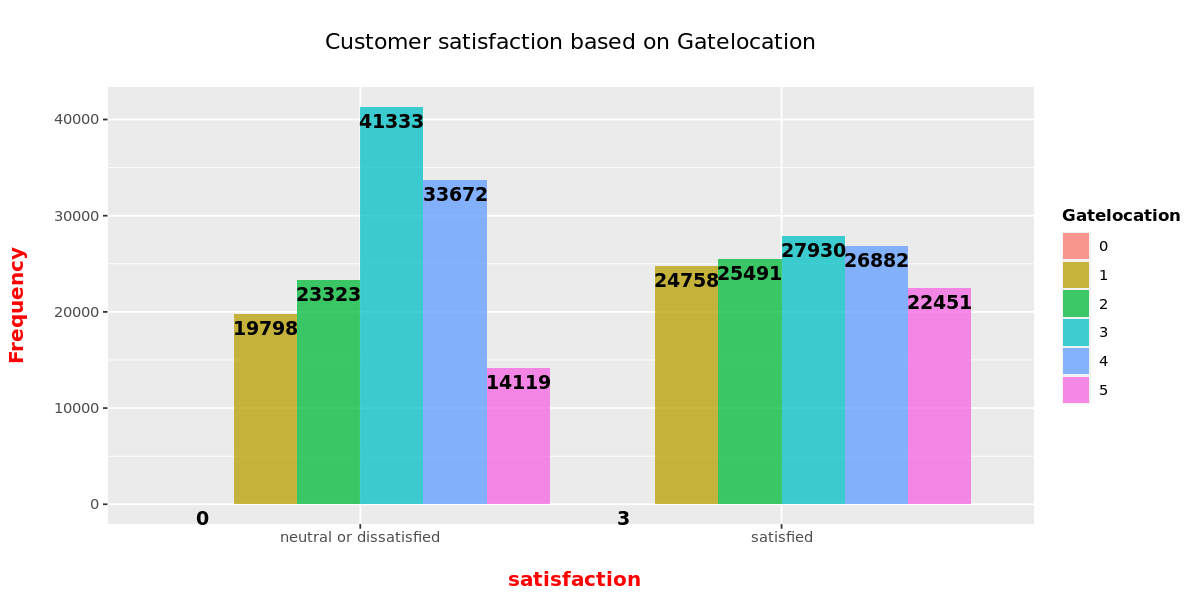

In [122]:
temp_df<-cbind(dataset[,c('satisfactionv2','Gatelocation')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Gatelocation)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Gatelocation \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

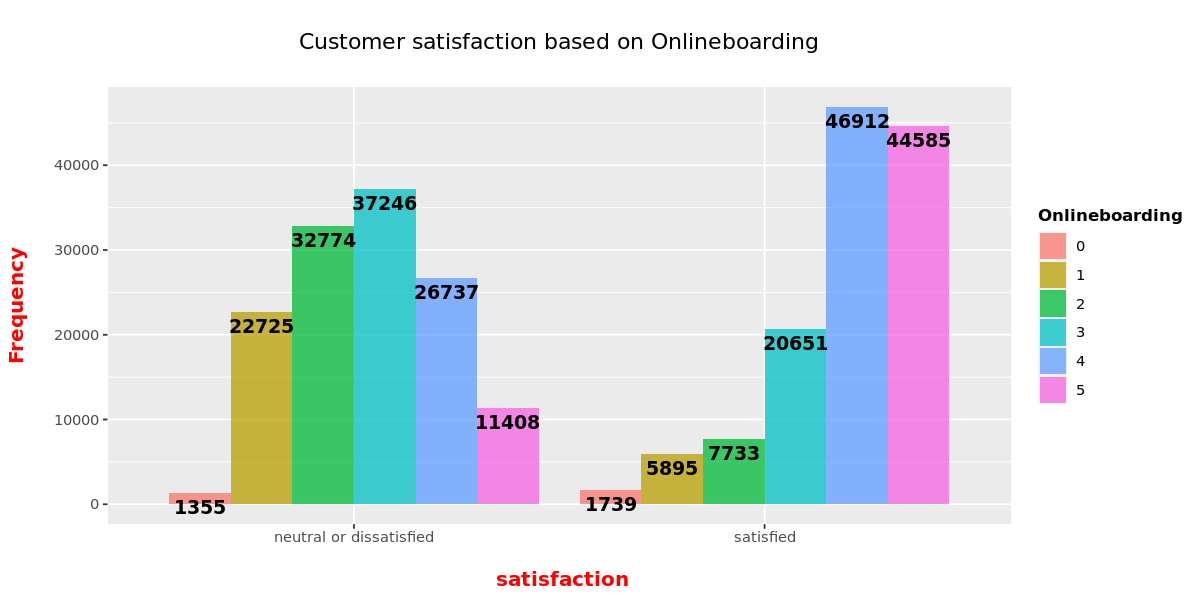

In [123]:
temp_df<-cbind(dataset[,c('satisfactionv2','Onlineboarding')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Onlineboarding)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Onlineboarding \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

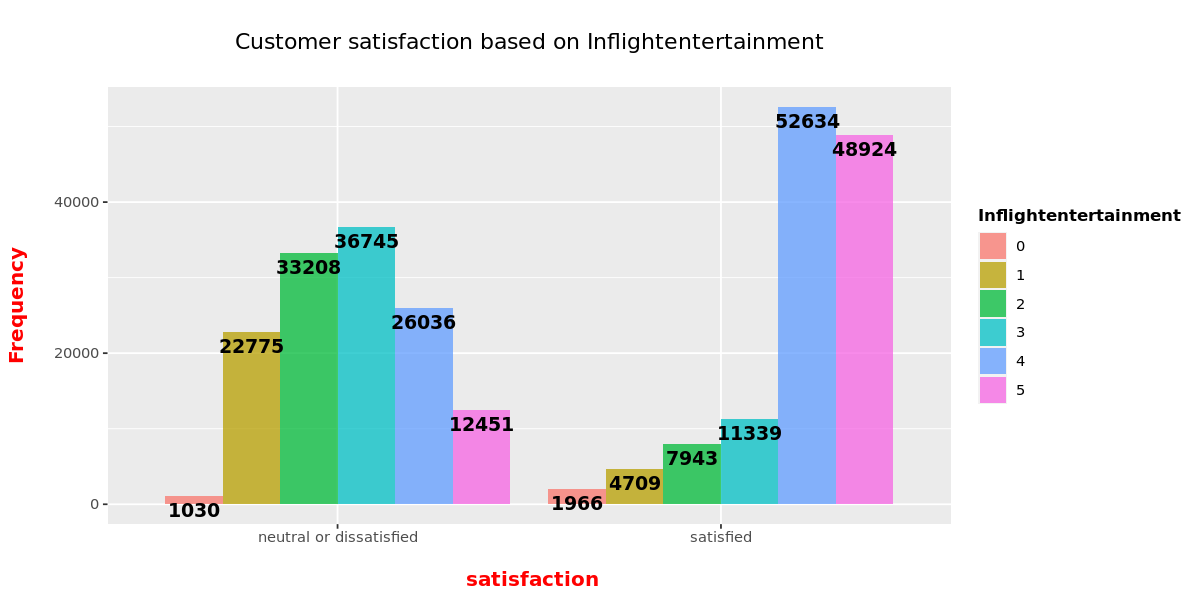

In [124]:
temp_df<-cbind(dataset[,c('satisfactionv2','Inflightentertainment')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =Inflightentertainment)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Inflightentertainment \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

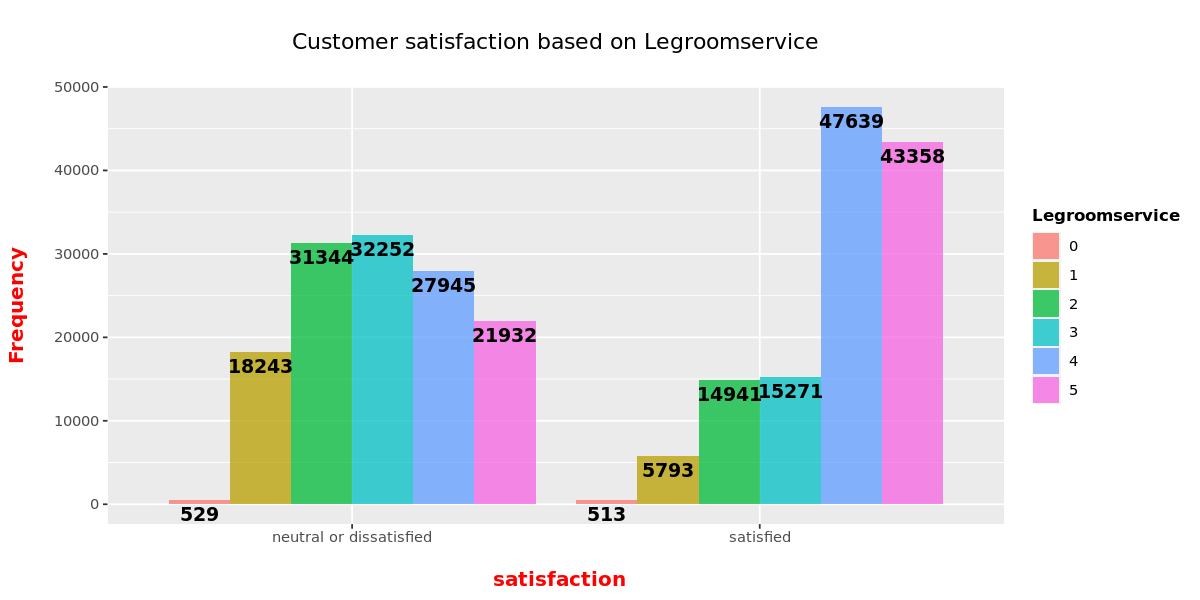

In [125]:
temp_df<-cbind(dataset[,c('satisfactionv2','Legroomservice')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Legroomservice)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Legroomservice \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

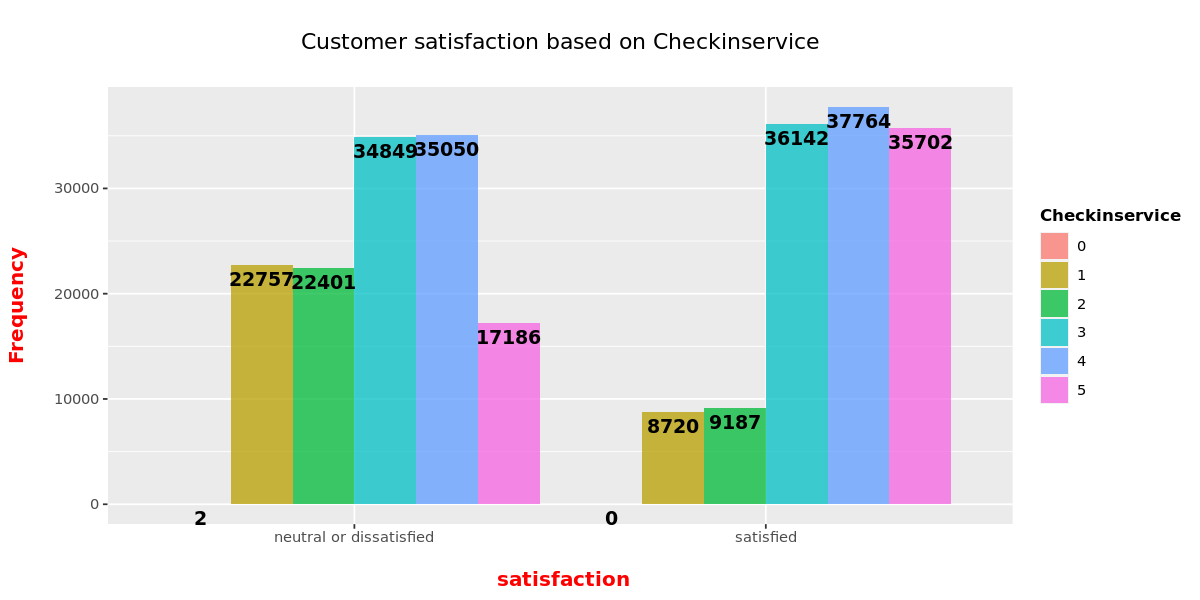

In [126]:
temp_df<-cbind(dataset[,c('satisfactionv2','Checkinservice')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Checkinservice)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Checkinservice \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

## Visualizing Relationship of a Customer Satisfation fields with maximum and mean of a scale

### Visualizing Relationship between a Cusomter Satisfaction fields with maximum occurance from all satisfation scale for each customer 

In [127]:
sat_data=dataset[,sat_cols]
# Calculate a maximum occurance from all satisfation scale for each customer  
max_occurance<-apply(sat_data,1,function(x) names(which.max(table(x))))

In [128]:
# create dataframe of max occurance scale
max_occur<-data.frame( max_occur = max_occurance)
sat=dataset[,c("satisfactionv2")]
# combine dataframe of max occurance and final statisfaction
max_sat<-cbind(max_occur,sat)

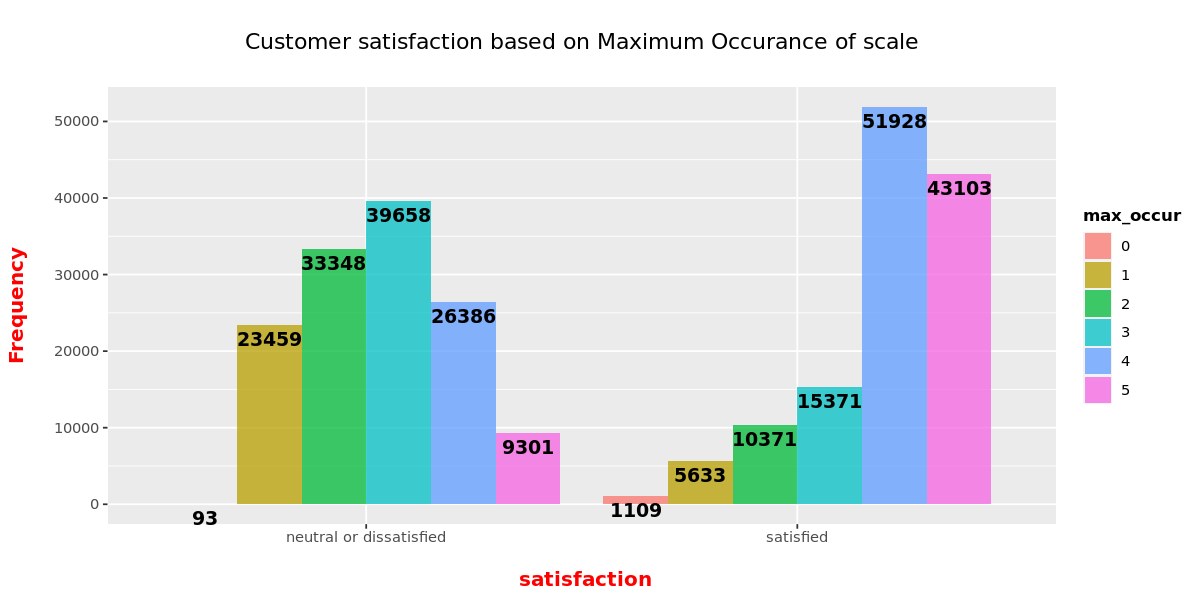

In [129]:
results <- data.frame(table(max_sat))
ggplot(data = results, aes(x = sat, y = Freq, fill =max_occur)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Maximum Occurance of scale \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

### Visualizing Relationship between a Cusomter Satisfaction fields with mean occurance from all satisfation scale for each customer 

In [130]:
mean_occurance<-round(rowMeans(sat_data))
# create dataframe of max occurance scale
mean_occur<-data.frame( mean_occur = mean_occurance)
sat=dataset[,c("satisfactionv2")]
# combine dataframe of max occurance and final statisfaction
mean_sat<-cbind(mean_occur,sat)
summary(mean_sat)

   mean_occur        sat           
 Min.   :1.000   Length:259760     
 1st Qu.:3.000   Class :character  
 Median :3.000   Mode  :character  
 Mean   :3.247                     
 3rd Qu.:4.000                     
 Max.   :5.000                     

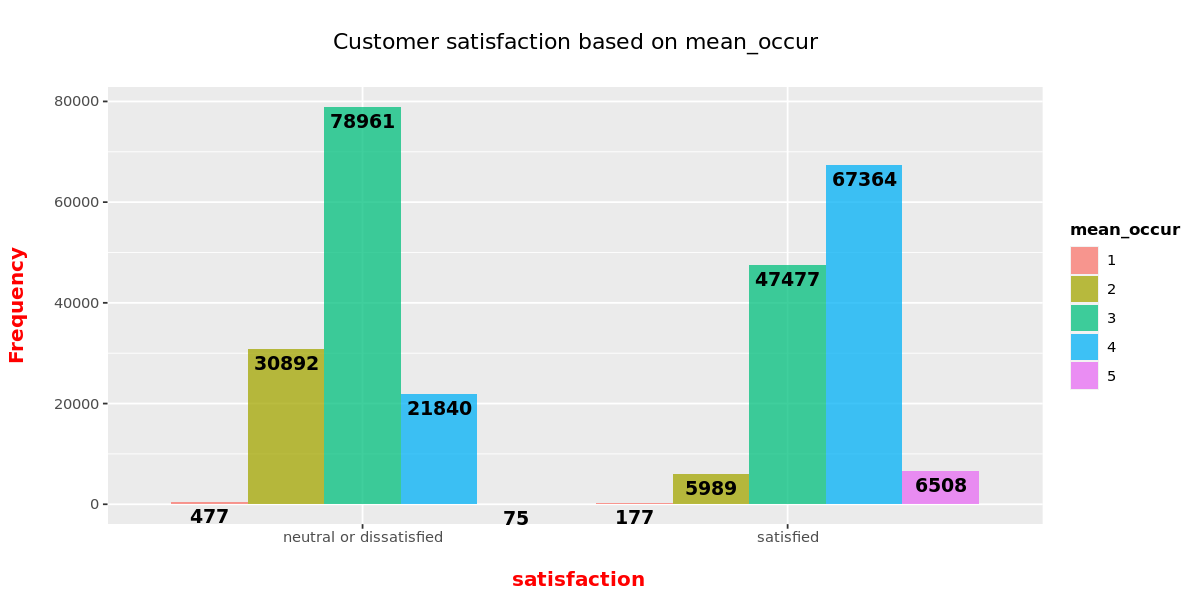

In [131]:
results <- data.frame(table(mean_sat))
ggplot(data = results, aes(x = sat, y = Freq, fill =mean_occur)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on mean_occur \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

# Data preprocessing

In [132]:
dataset

satisfactionv2,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Seatcomfort,DepartureArrivaltimeconvenient,Foodanddrink,⋯,Inflightentertainment,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,⋯,4,3,3,0,3,5,3,2,0,0
satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,⋯,2,3,4,4,4,2,3,2,310,305
satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,⋯,0,2,3,3,4,4,4,2,0,0
satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,⋯,4,1,1,0,1,4,1,3,0,0
satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,⋯,3,2,2,0,2,4,2,5,0,0
satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,⋯,0,2,5,4,5,5,4,2,0,0
satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,⋯,5,5,5,0,5,5,5,3,17,15
satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,⋯,0,2,3,3,4,5,4,2,0,0
satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,⋯,3,4,4,0,1,5,4,4,0,0


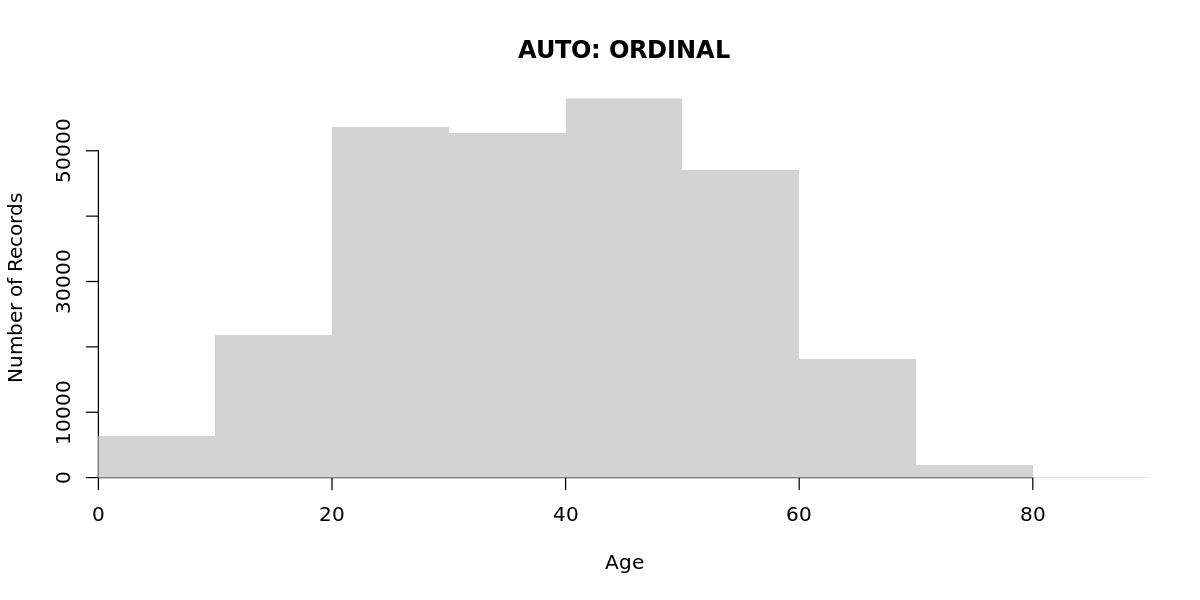

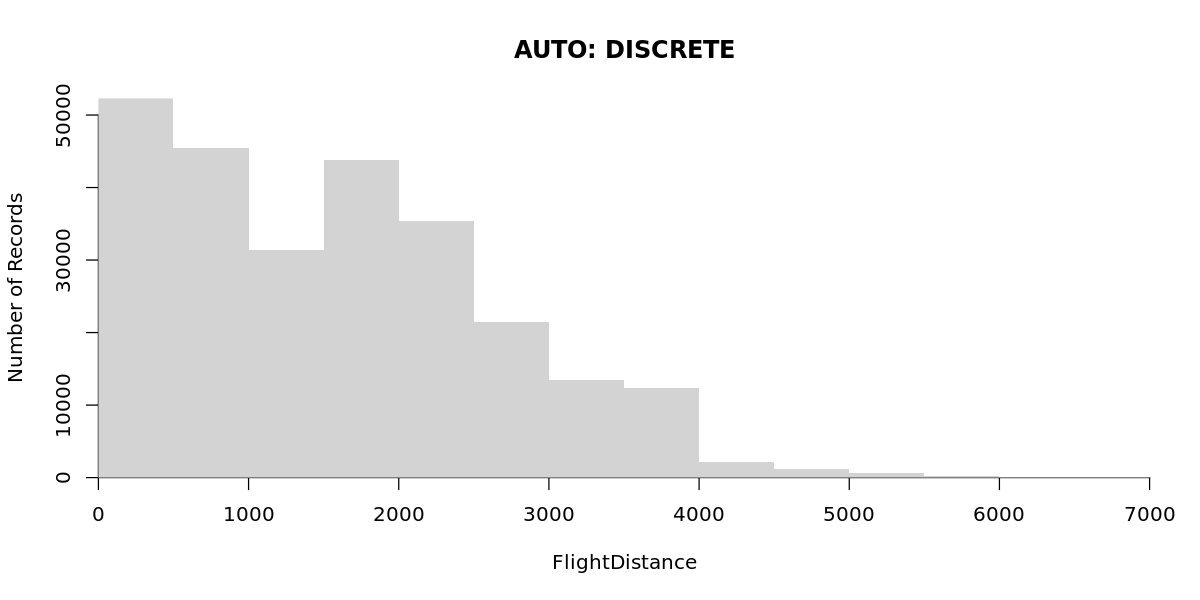

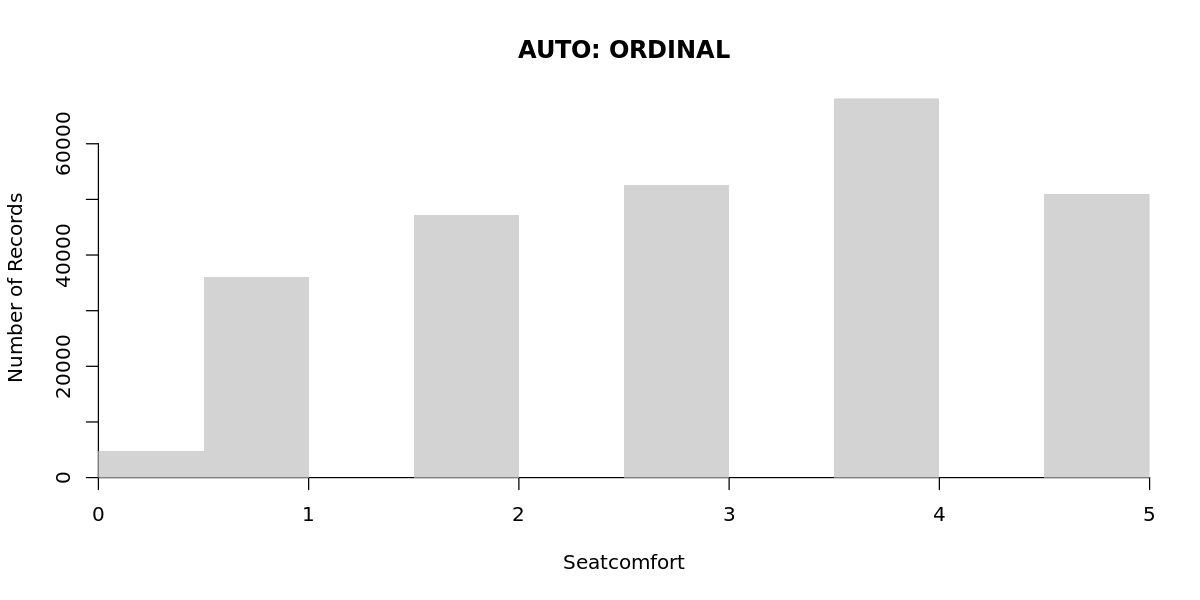

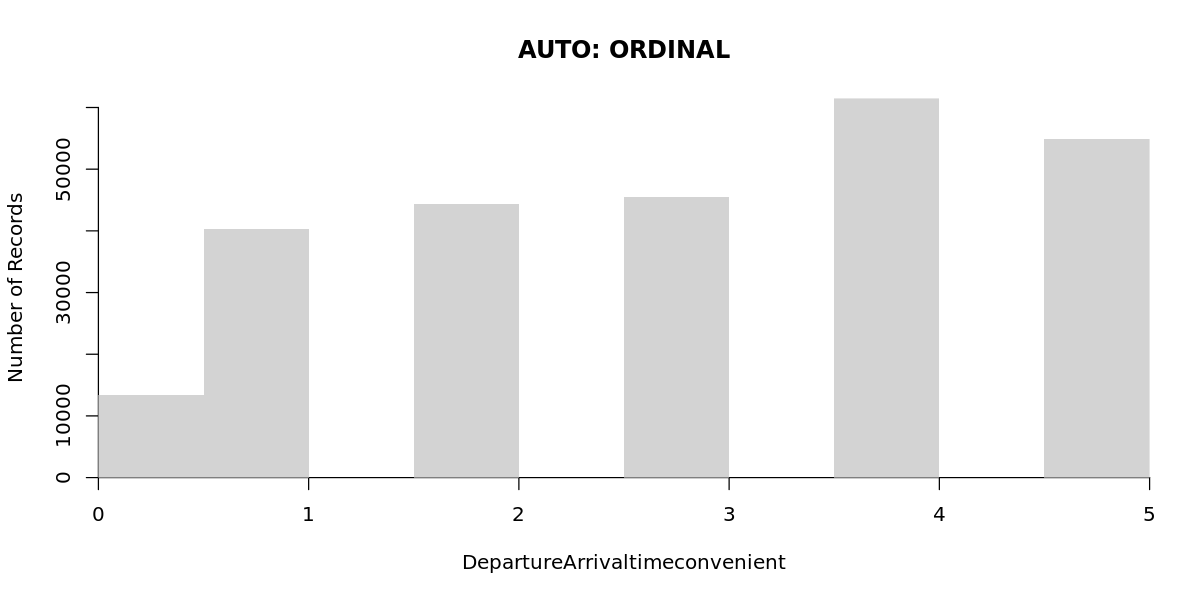

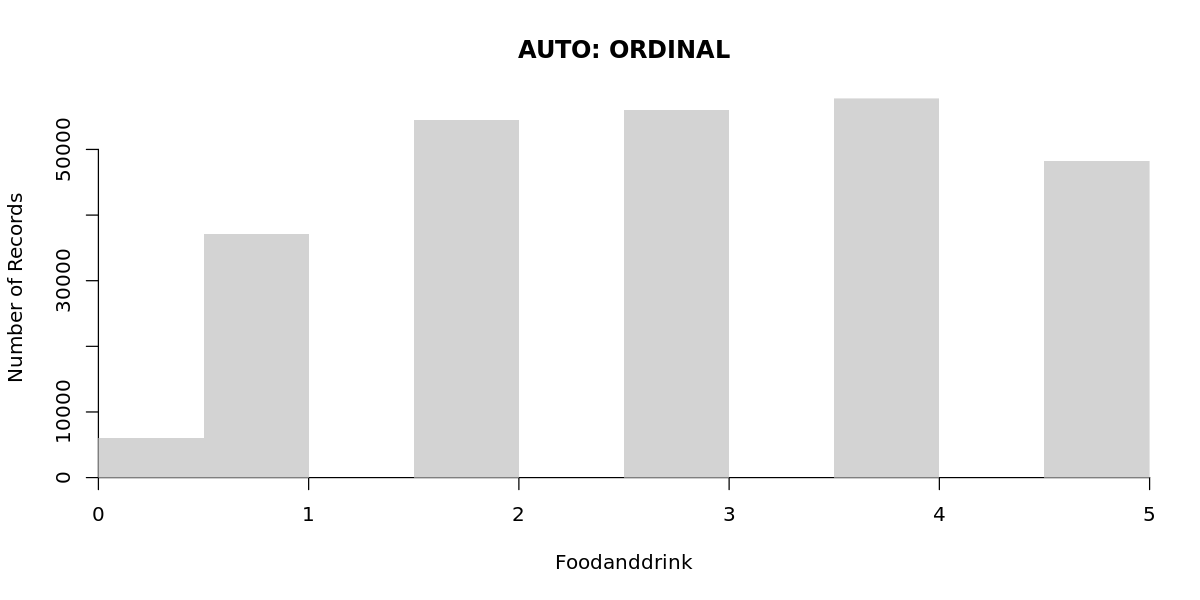

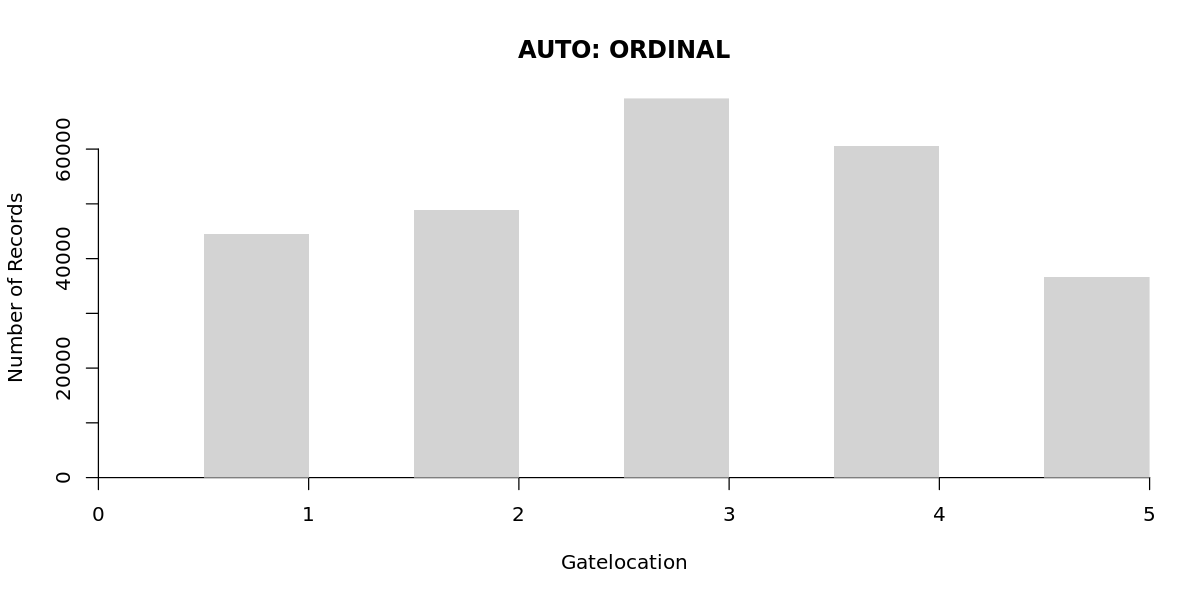

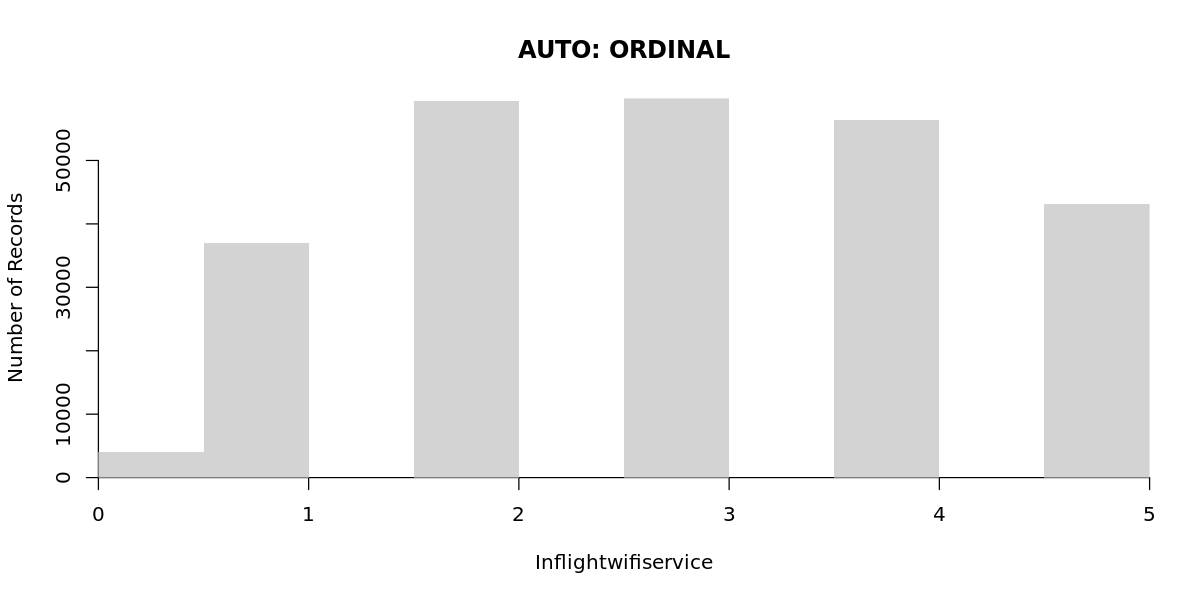

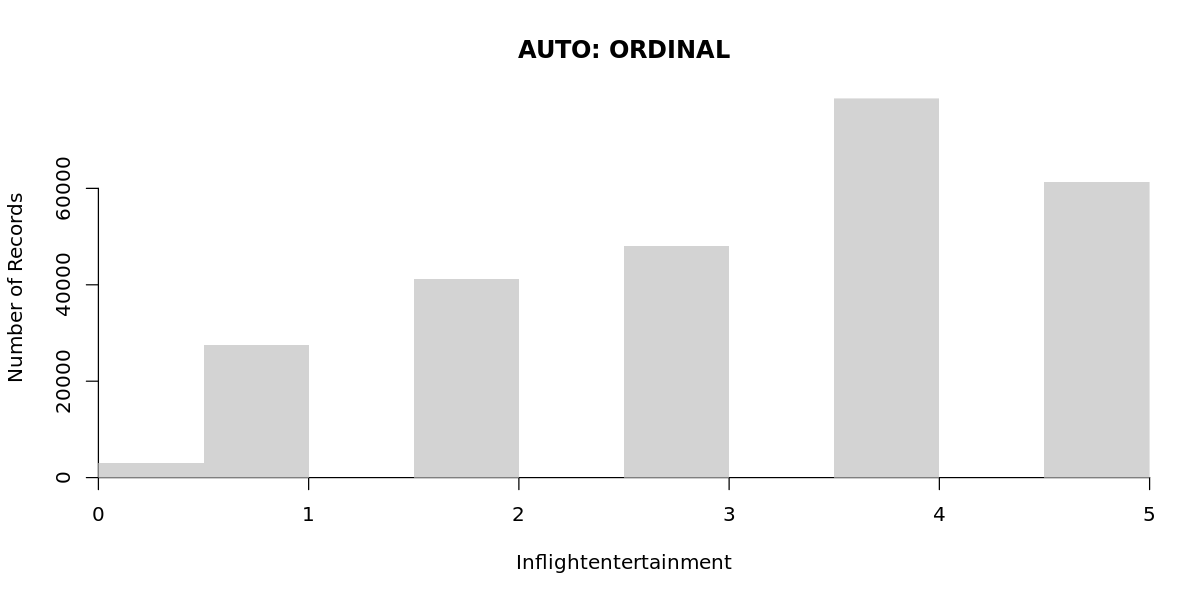

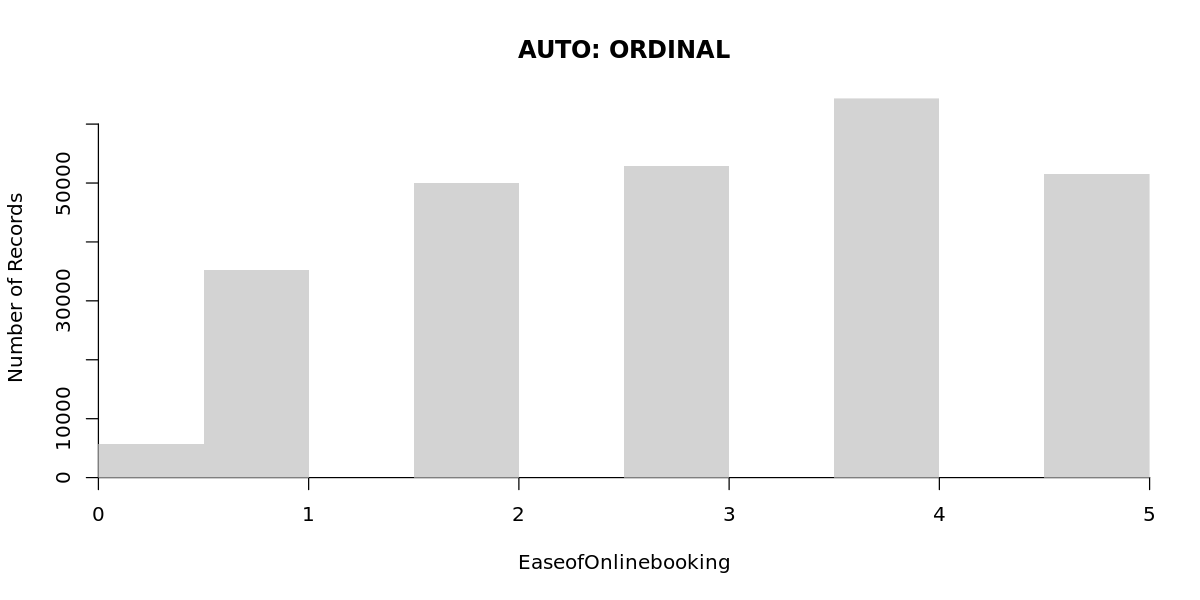

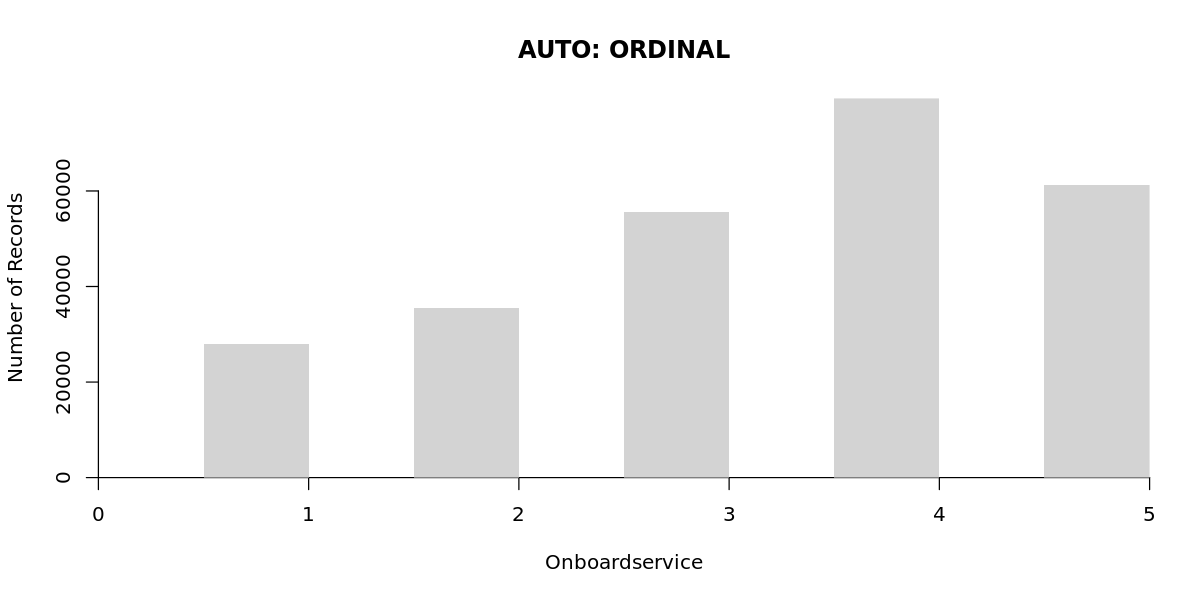

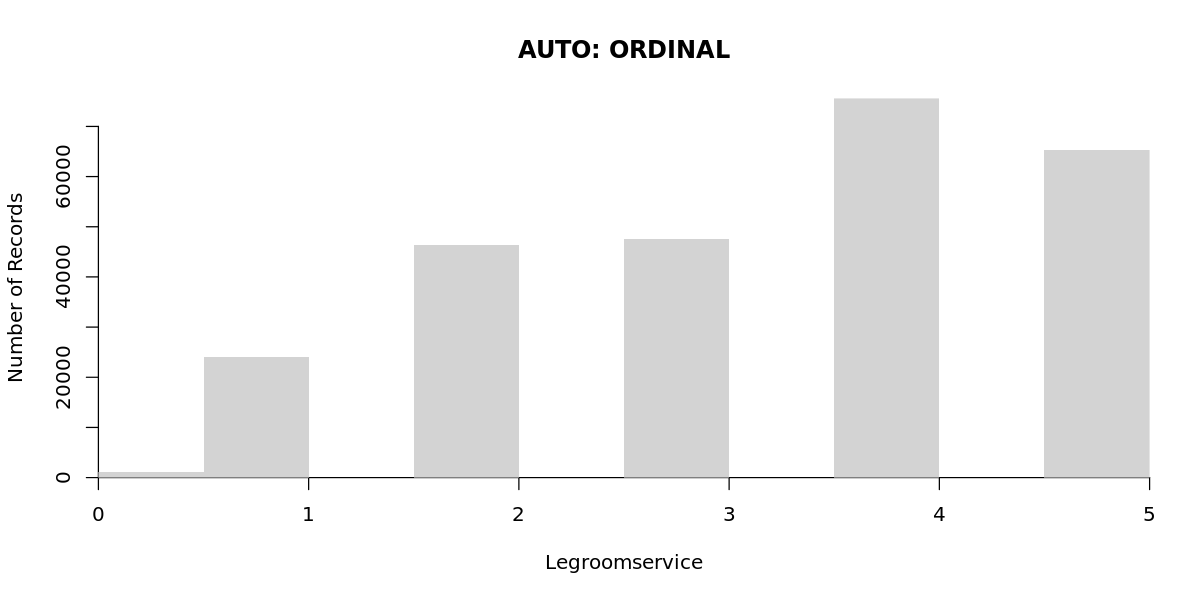

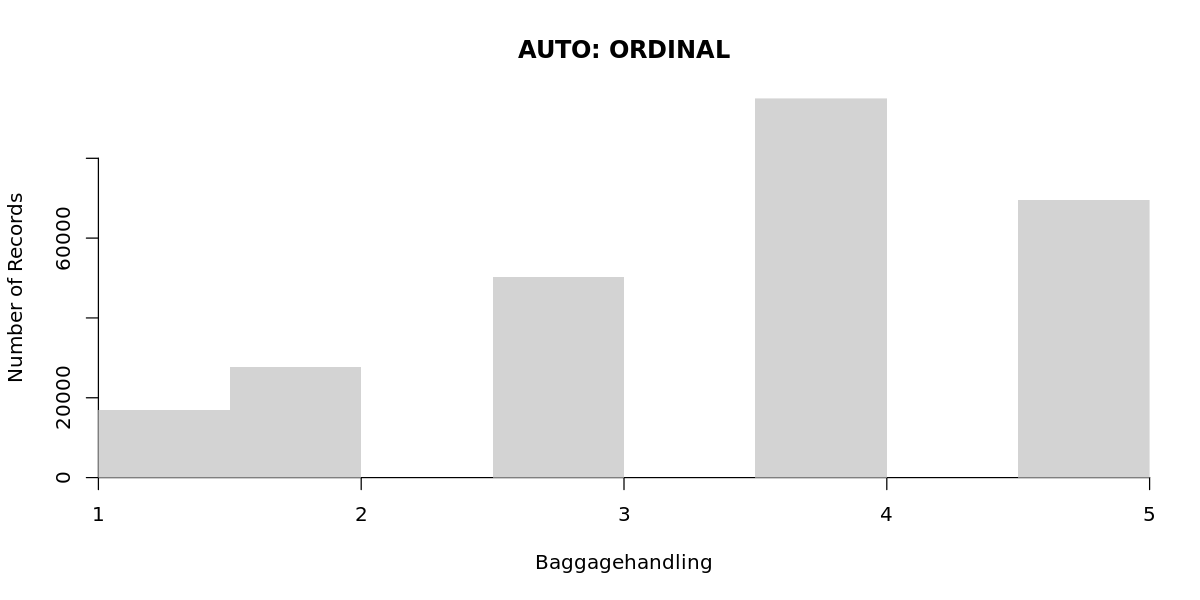

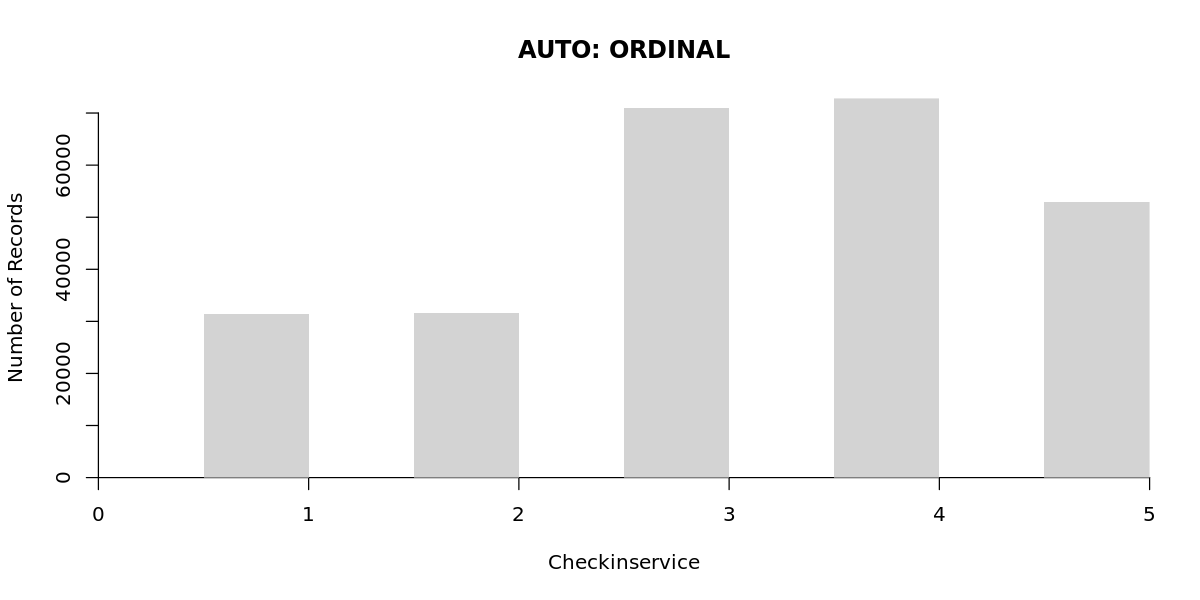

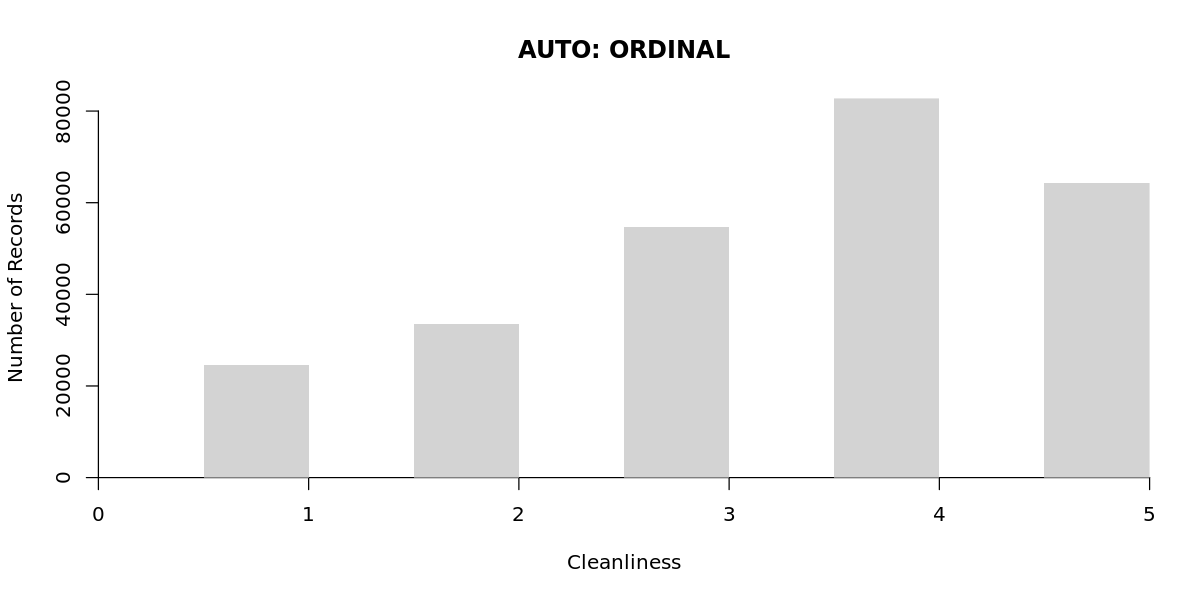

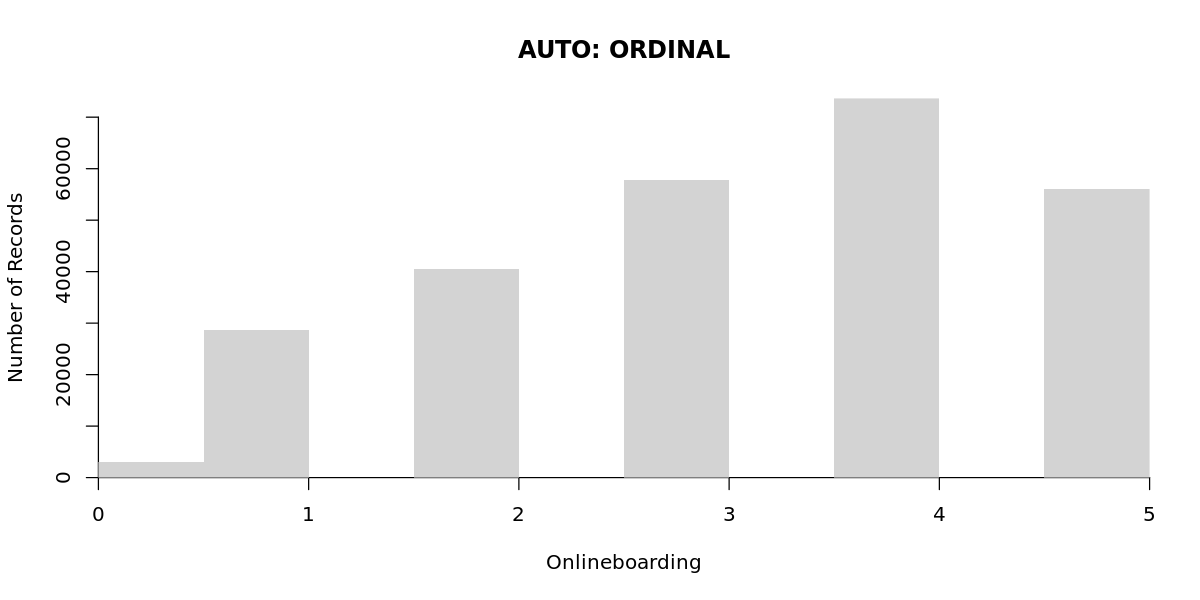

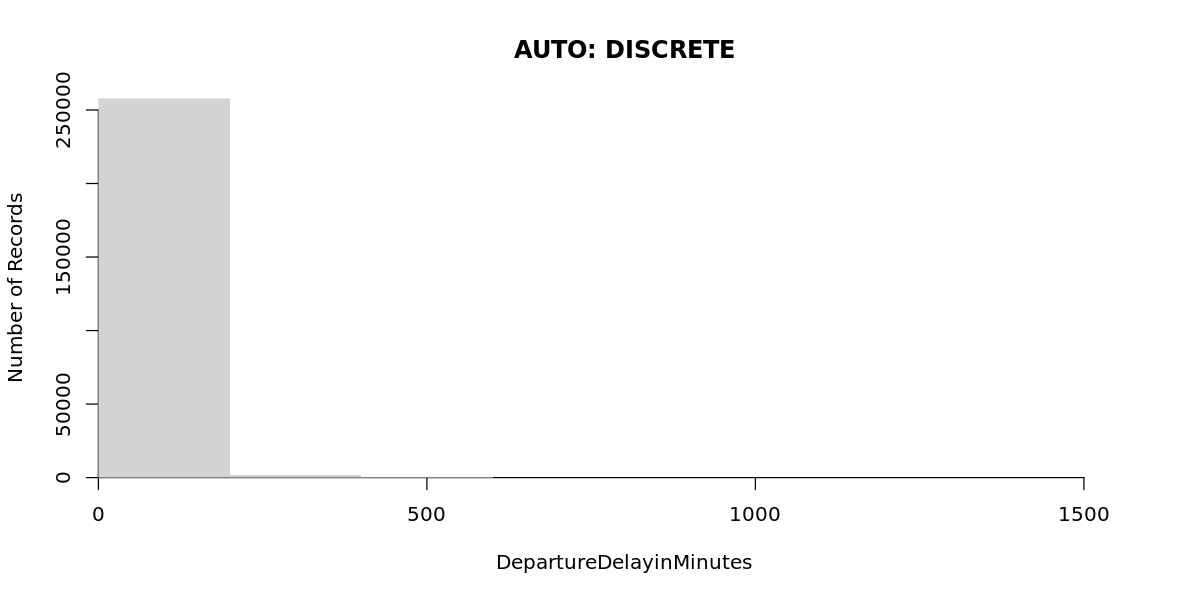

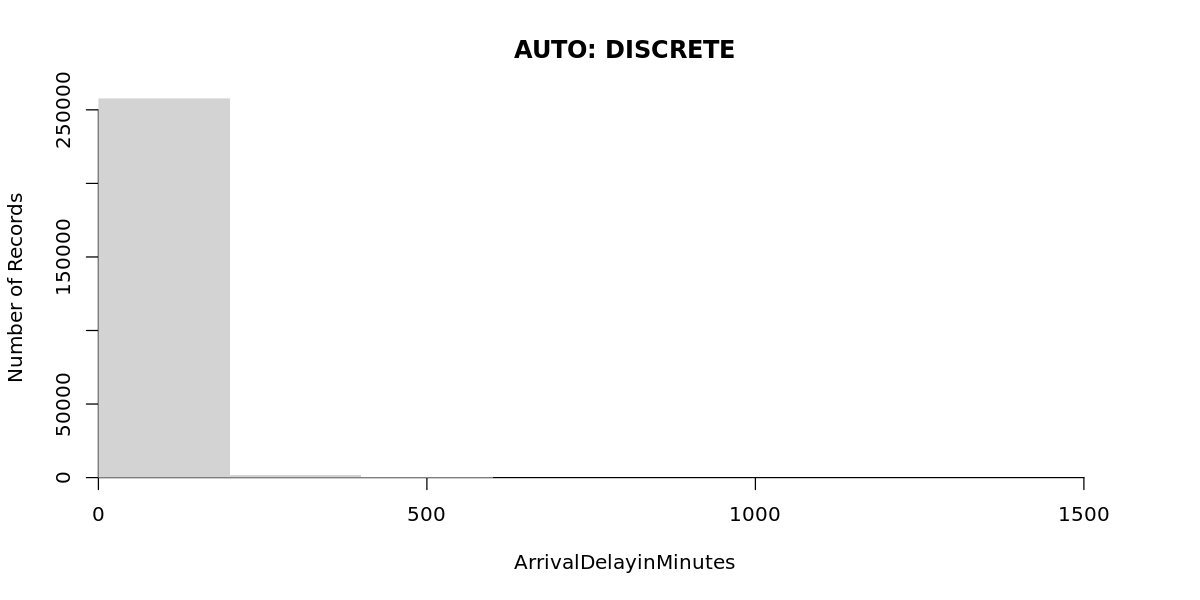

In [133]:
DISCRETE_BINS = 5
field_types_ord_dis<-NPREPROCESSING_discreteNumeric(dataset=dataset,field_types=field_types, cutoff=DISCRETE_BINS)

In [134]:
is_sat<-  ifelse(names(dataset)%in%sat_cols , "SAT", "NOTSAT")
is_time <- ifelse(names(dataset)%in%time_field,"TIME", "NOTTIME")
is_dis <- ifelse(names(dataset)%in%distance_field,'DIS','NOTDIS')
types_table<-data.frame(field=names(dataset),
                        initial=field_types,
                        types=field_types_ord_dis, 
                        is_sat=is_sat,
                        is_time=is_time,
                        is_dis = is_dis)
print(formattable::formattable(types_table))

types_table

field,initial,types,is_sat,is_time,is_dis
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
satisfactionv2,SYMBOLIC,SYMBOLIC,NOTSAT,NOTTIME,NOTDIS
Gender,SYMBOLIC,SYMBOLIC,NOTSAT,NOTTIME,NOTDIS
CustomerType,SYMBOLIC,SYMBOLIC,NOTSAT,NOTTIME,NOTDIS
Age,NUMERIC,ORDINAL,NOTSAT,NOTTIME,NOTDIS
TypeofTravel,SYMBOLIC,SYMBOLIC,NOTSAT,NOTTIME,NOTDIS
Class,SYMBOLIC,SYMBOLIC,NOTSAT,NOTTIME,NOTDIS
FlightDistance,NUMERIC,DISCRETE,NOTSAT,NOTTIME,DIS
Seatcomfort,NUMERIC,ORDINAL,SAT,NOTTIME,NOTDIS
DepartureArrivaltimeconvenient,NUMERIC,ORDINAL,SAT,NOTTIME,NOTDIS


In [135]:
######
# 
# Rescale a satisfaction scale column in range of 0.0-1.0
# Input: 
#
######
Preprocess_satscale<-function(input){
    
    
    # max and min is  5 and 0 respectively since the scale is from 0 to 5
    minscale<-0.0
    maxscale<-5.0
    
    rescale<- ((input-minscale)/(maxscale-minscale))
    
    return(rescale)
}
######
#
# Apply linear normalization for rescale a value in a fields into range 0-1
#
####
Preprocess_ordinalscale<-function(input){
    
     minscale<-min(input)
     maxscale<-max(input)
    
    rescale<- ((input-minscale)/ (maxscale-minscale))
    
    return(rescale)

}

########
#
# Normailze an entire dataframe into range of 0-1
#
######
Preprocess_dataframe<-function(dataset,sat){
    
    if(sat==TRUE){
  
        fields<-sapply(as.data.frame(dataset),Preprocess_satscale)
   
    }else{
   
        fields<-sapply(as.data.frame(dataset),Preprocess_ordinalscale)
    }
    
    return(fields)
}


#######
#
#
# Preprocess Ordinal Value
#
#
#######
Preprocess_ordinal<-function(dataset,fieldtype){
    
   
   sat_position<-which(fieldtype[,'is_sat']=='SAT')

   sat_fields=dataset[,sat_position]
  
   sat_fields<-Preprocess_dataframe(sat_fields,TRUE)
    
   ordinal<-which(fieldtype[,'types']=='ORDINAL')
  
   other_position<- ordinal[!(ordinal %in% sat_position)]
    
   colname = names(dataset[other_position])
   other_ordinal<-dataset[,other_position]
   
 
   other_ordinal<-Preprocess_dataframe(other_ordinal, FALSE)
    
   colnames(other_ordinal) <- colname
    
   processed<- cbind(other_ordinal,sat_fields)
  
   return(processed)
     
  
}

In [136]:

processed_ordinal<-Preprocess_ordinal(dataset,types_table)
head(processed_ordinal)

Age,Seatcomfort,DepartureArrivaltimeconvenient,Foodanddrink,Gatelocation,Inflightwifiservice,Inflightentertainment,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding
0.7435897,0,0,0,0.4,0.4,0.8,0.6,0.6,0.0,0.6,1.0,0.6,0.4
0.5128205,0,0,0,0.6,0.0,0.4,0.6,0.8,0.8,0.8,0.4,0.6,0.4
0.1025641,0,0,0,0.6,0.4,0.0,0.4,0.6,0.6,0.8,0.8,0.8,0.4
0.6794872,0,0,0,0.6,0.6,0.8,0.2,0.2,0.0,0.2,0.8,0.2,0.6
0.8076923,0,0,0,0.6,0.8,0.6,0.4,0.4,0.0,0.4,0.8,0.4,1.0
0.2948718,0,0,0,0.6,0.4,0.0,0.4,1.0,0.8,1.0,1.0,0.8,0.4


In [137]:
######
#
#Convert a time delay in minutes into 3 numbers represent 3 categorie
#
# 1. No Delays
# 2. 0-30 minutes delays
# 3. 30 and above delays
#
#####
Convert_minuteDelay<-function(data){
    
   
    out<-ifelse(data==0,'0',
         ifelse(data<30,"1",
         ifelse(data<60,"2","3")))
    
    return((out))
}

Convert_FlightDistance<-function(data){
    
    
    
}

Process_timeDelay<-function(dataset){
    
    out<-sapply(dataset,Convert_minuteDelay)
  
    return(out)
}

Process_distance<-function(dataset){
    
    }
    
    
    

In [138]:
categor_data<-dataset[,symbolic_index]
time_data<-dataset[,time_field]
time_data<-Process_timeDelay(time_data)
distance_data<-dataset[,distance_field]
categor_data<-cbind(categor_data,time_data)
#categor_data<-cbind(categor_data,distance_data)
head(categor_data)

,satisfactionv2,Gender,CustomerType,TypeofTravel,Class,DepartureDelayinMinutes,ArrivalDelayinMinutes
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0
2,satisfied,Male,Loyal Customer,Personal Travel,Business,3,3
3,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0
4,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0
5,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0
6,satisfied,Male,Loyal Customer,Personal Travel,Eco,0,0


In [139]:
Preprocess_categorical<-function(dataset){

  catagorical<-data.frame()

  field_name<-names(dataset)

  for (field in field_name){

    # Convert into factors. A level for each unique string
    ffield<-factor(dataset[,field])

 

    # 1-hot encoding. A new column for each unique "level"
    xx<-data.frame(model.matrix(~ffield+0, data=ffield))

    names(xx)<-gsub("ffield",field,names(xx))

    # If 2 unique values, then can encode as a single "binary" column
    if (ncol(xx)==2){
      xx<-xx[,-2,drop=FALSE]
      names(xx)<-field  # Field name without the value appended
    }

  catagorical<-as.data.frame(append(catagorical,xx))

  } #endof for()
  return (catagorical)

} # endof categorical_encoding()

processed_catdata<-Preprocess_categorical(categor_data)
head(processed_catdata)

,satisfactionv2,Gender,CustomerType,TypeofTravel,ClassBusiness,ClassEco,ClassEco.Plus,DepartureDelayinMinutes0,DepartureDelayinMinutes1,DepartureDelayinMinutes2,DepartureDelayinMinutes3,ArrivalDelayinMinutes0,ArrivalDelayinMinutes1,ArrivalDelayinMinutes2,ArrivalDelayinMinutes3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
4,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
5,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
6,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0


In [140]:
a <-dataset[, grepl(distance_field, names(dataset)), drop = FALSE]

In [141]:
s<-summary(a)

In [142]:
processed_data<-cbind(processed_catdata, processed_ordinal)
processed_data<-cbind(processed_data,time_data)

In [143]:
# Convert label 0 to 1 and vice versa for satisfation label to represent 1 for statisfy  and 0 for not 
processed_data$satisfactionv2 <- ifelse(as.numeric(processed_data$satisfactionv2)==0,1,0)

In [144]:
tail(processed_data)

,satisfactionv2,Gender,CustomerType,TypeofTravel,ClassBusiness,ClassEco,ClassEco.Plus,DepartureDelayinMinutes0,DepartureDelayinMinutes1,DepartureDelayinMinutes2,⋯,Inflightentertainment,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
259755,1,0,0,1,0,1,0,1,0,0,⋯,1,0.4,0.4,0.8,0.6,0.8,1.0,1.0,0,0
259756,1,1,0,1,1,0,0,1,0,0,⋯,1,1.0,1.0,1.0,1.0,1.0,0.8,0.4,0,0
259757,1,1,0,1,0,1,0,0,0,0,⋯,1,0.2,1.0,0.8,0.2,0.4,1.0,1.0,3,3
259758,1,0,0,1,1,0,0,1,0,0,⋯,1,0.2,0.2,0.6,0.2,1.0,0.4,1.0,0,0
259759,1,1,0,1,1,0,0,1,0,0,⋯,1,0.2,0.8,0.8,0.4,1.0,1.0,1.0,0,0
259760,1,1,0,1,1,0,0,1,0,0,⋯,1,0.6,0.4,1.0,0.8,1.0,1.0,1.0,0,0


In [145]:
summary(processed_data)

 satisfactionv2       Gender        CustomerType     TypeofTravel   
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :1.0000   Median :0.0000   Median :1.0000  
 Mean   :0.4909   Mean   :0.5074   Mean   :0.1831   Mean   :0.6906  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
 ClassBusiness       ClassEco      ClassEco.Plus     DepartureDelayinMinutes0
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.0000          
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000          
 Median :0.0000   Median :0.0000   Median :0.00000   Median :1.0000          
 Mean   :0.4786   Mean   :0.4489   Mean   :0.07246   Mean   :0.5648          
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:1.0000          
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000